<a href="https://colab.research.google.com/github/Fer448/curso104/blob/main/FICHERO_PERCEPCION_COVID_PERSISTENTE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
### FICHERO PERCEPCION COVID PERSISTENTE

In [ ]:
pip install pandas matplotlib seaborn scikit-learn


=== ANÁLISIS DESCRIPTIVO ===

Estadísticas de fatiga:
                                                    count      mean       std  \
Fatiga 1. Mi motivación es menor cuando estoy f...  360.0  5.788889  1.876371   
Fatiga 2. El ejercicio me fatiga (1-7)              360.0  5.722222  1.891354   
Fatiga 3. Me canso fácilmente (1-7)                 360.0  5.500000  1.933433   
Fatiga 4. La fatiga interfiere con mi funcionam...  360.0  5.694444  1.917802   
Fatiga 5. La fatiga me causa problemas frecuent...  360.0  5.416667  1.981460   
Fatiga 6. La fatiga me impide el funcionamiento...  360.0  5.763889  1.896288   
Fatiga 7. La fatiga me impide realizar algunas ...  360.0  5.505556  2.060363   
Fatiga 8. La fatiga es uno de los síntomas que ...  360.0  5.419444  2.077646   
Fatiga 9. La fatiga interfiere con mi trabajo, ...  360.0  5.205556  2.198245   

                                                    min  25%  50%  75%  max  
Fatiga 1. Mi motivación es menor cuando estoy f...  1.0 

/tmp/ipython-input-3-1039780975.py:61: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


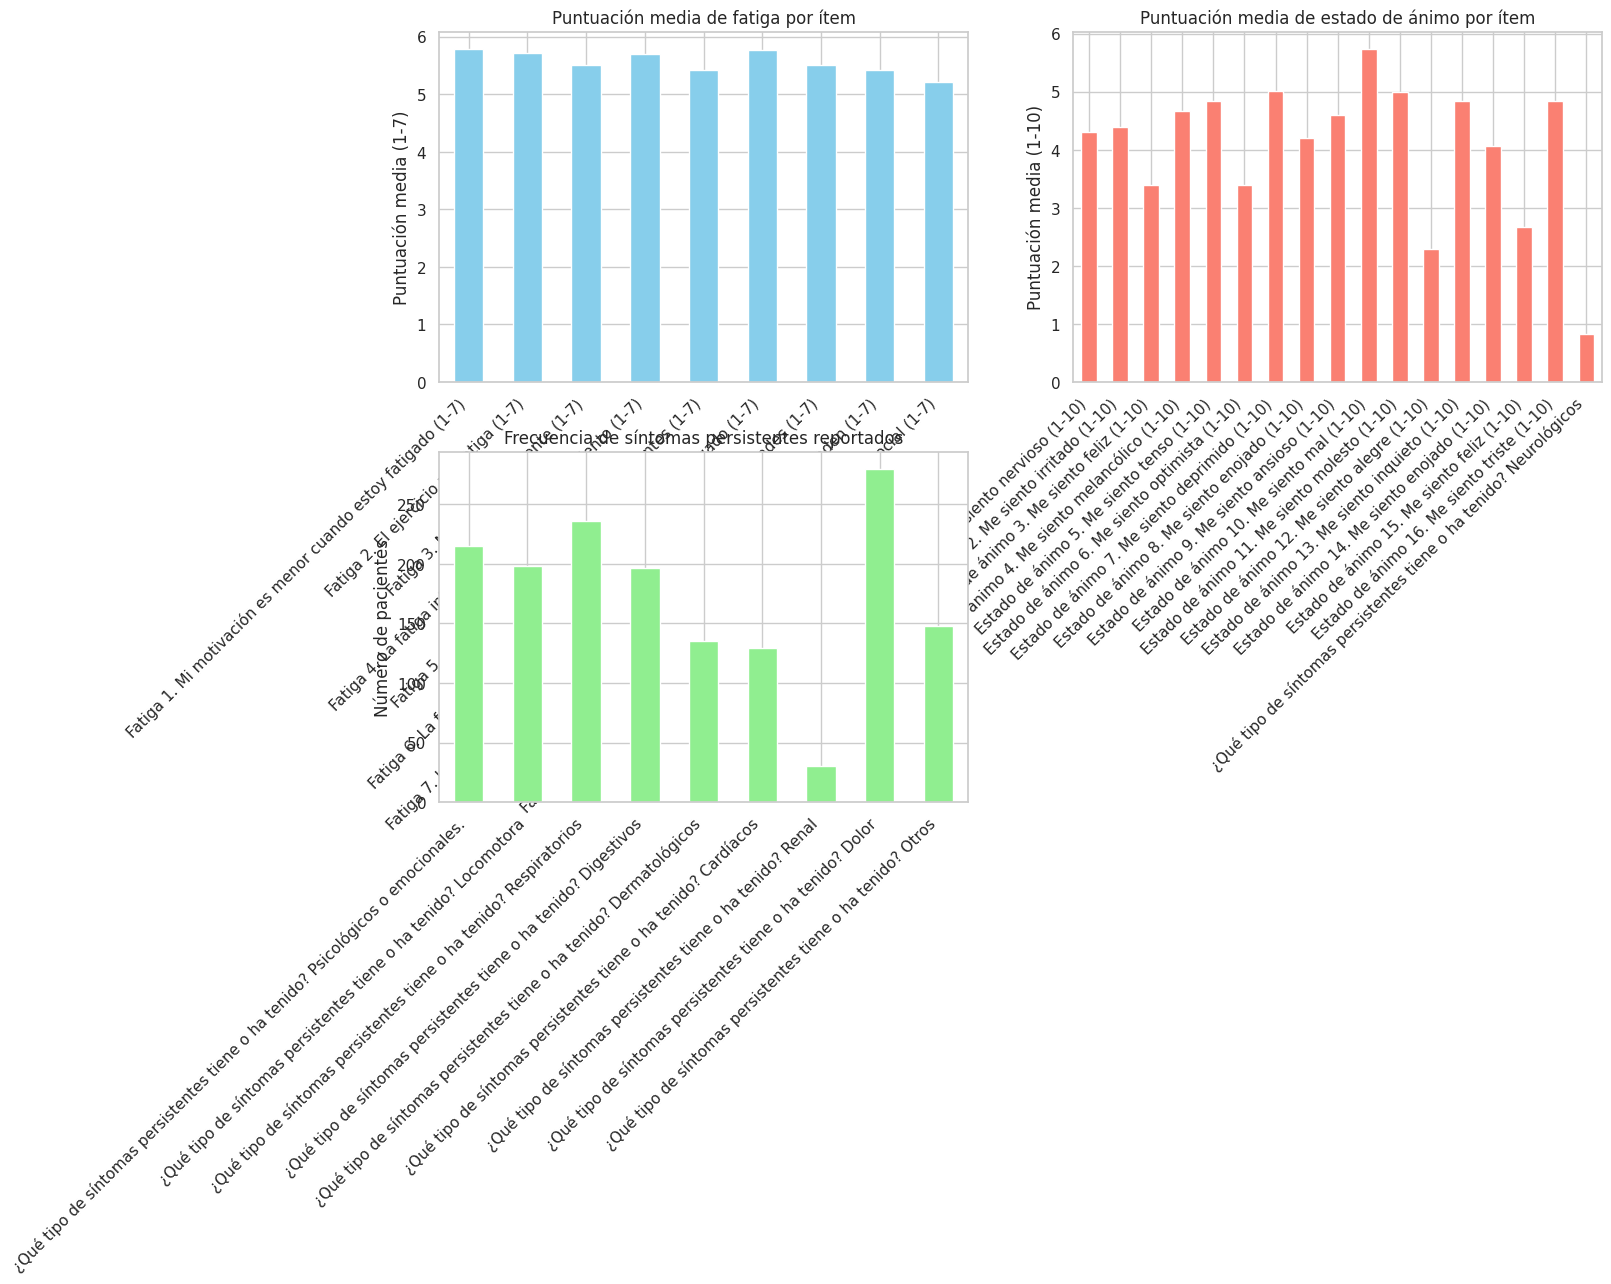


=== ANÁLISIS DE CORRELACIÓN ===



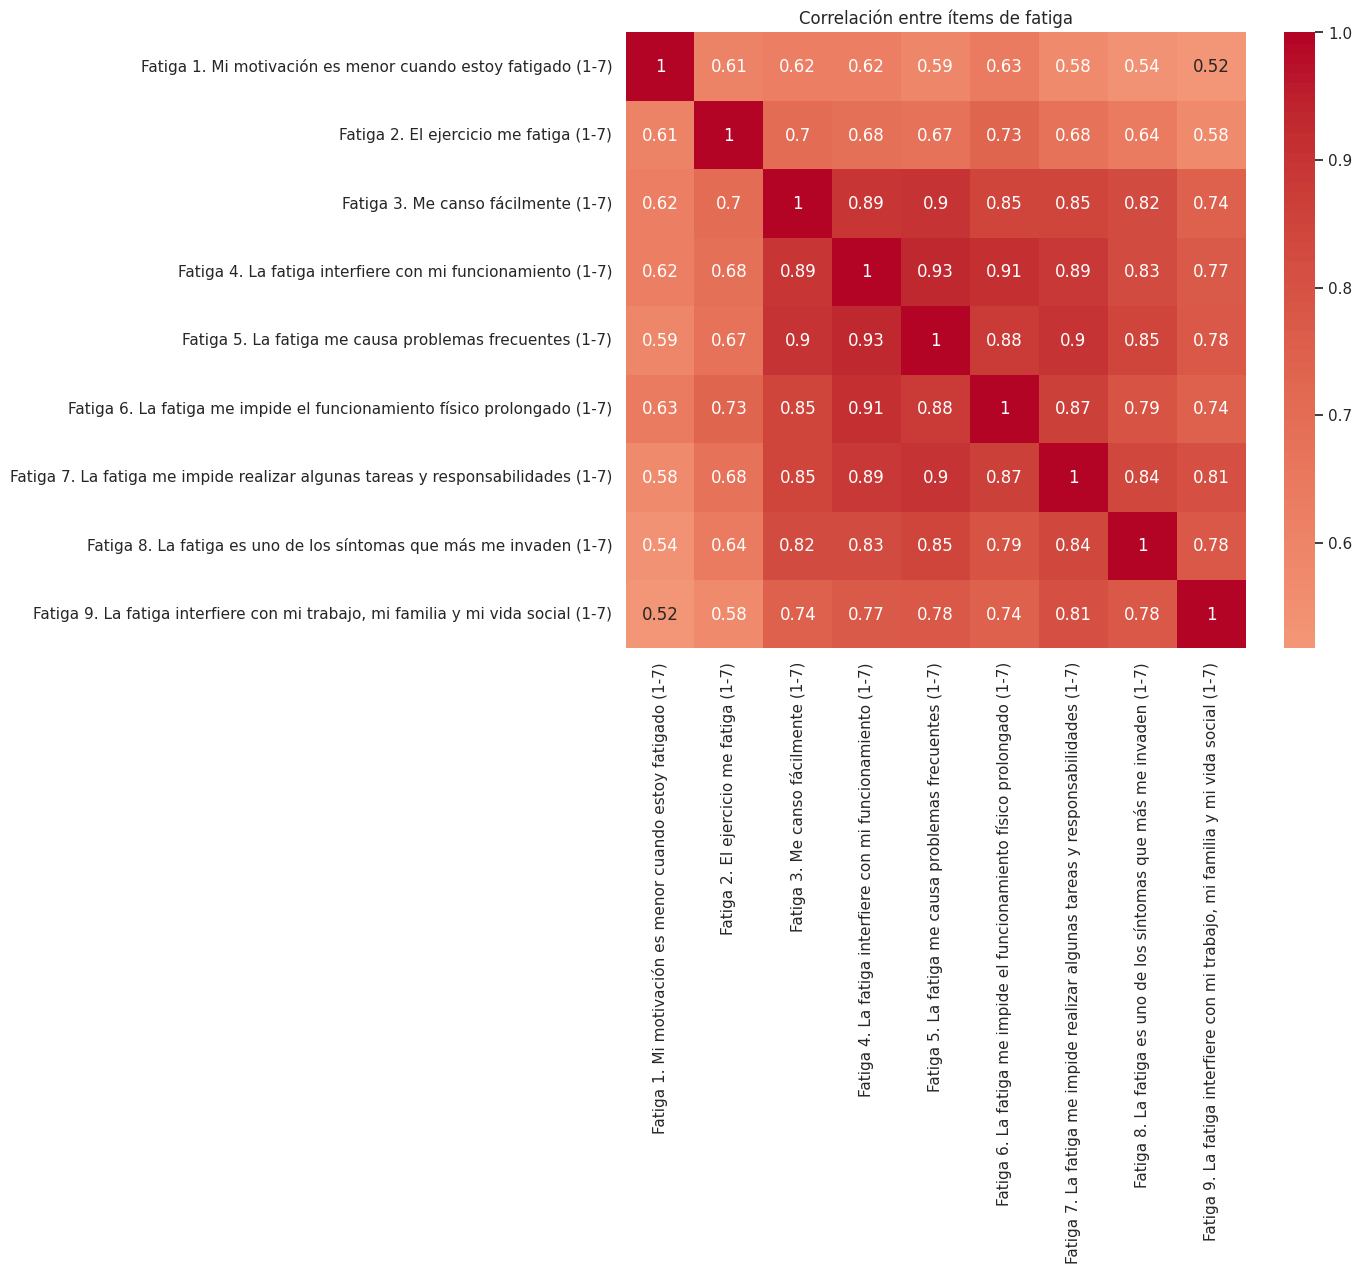

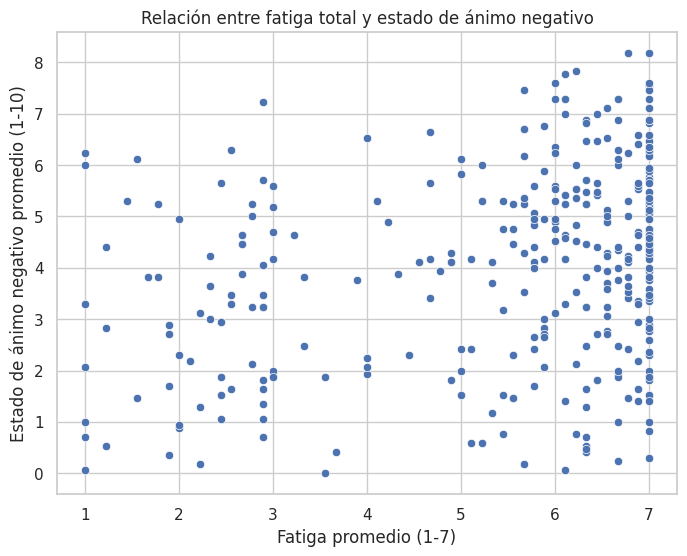


=== AGRUPAMIENTO DE PACIENTES ===

Características de cada cluster basado en fatiga:
         Fatiga 1. Mi motivación es menor cuando estoy fatigado (1-7)  \
Cluster                                                                 
0                                                 6.714286              
1                                                 3.645570              
2                                                 2.590909              

         Fatiga 2. El ejercicio me fatiga (1-7)  \
Cluster                                           
0                                      6.471042   
1                                      3.177215   
2                                      6.045455   

         Fatiga 3. Me canso fácilmente (1-7)  \
Cluster                                        
0                                   6.405405   
1                                   2.392405   
2                                   6.000000   

         Fatiga 4. La fatiga interfiere con mi func

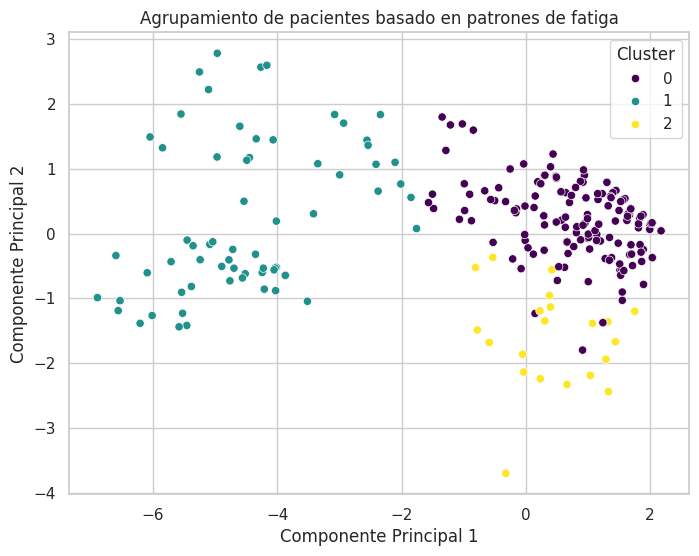

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Cargar los datos
df = pd.read_excel(r'/content/drive/MyDrive/Colab Notebooks/percepcion_covid_persistente.xlsx', sheet_name='Respuestas de formulario 1')

# Filtrar solo pacientes con COVID persistente (columna B = 1)
df = df[df['¿Es usted un paciente con síntomas prolongados de COVID-19?'] == 1]

# 2. Análisis Descriptivo Básico
print("\n=== ANÁLISIS DESCRIPTIVO ===\n")

# Columnas de fatiga (C-K)
fatiga_cols = df.columns[2:11]
print("Estadísticas de fatiga:")
print(df[fatiga_cols].describe().transpose())

# Columnas de estado de ánimo (L-AA)
animo_cols = df.columns[11:28]
print("\nEstadísticas de estado de ánimo:")
print(df[animo_cols].describe().transpose())

# Columnas de síntomas persistentes (AB-AK)
sintomas_cols = df.columns[28:]
print("\nFrecuencia de síntomas persistentes:")
for col in sintomas_cols:
    print(f"\n{col}:")
    print(df[col].value_counts())

# 3. Visualización de distribuciones
print("\n=== VISUALIZACIONES ===\n")

# Configurar estilo de los gráficos
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))

# Histogramas para fatiga
plt.subplot(2, 2, 1)
df[fatiga_cols].mean().plot(kind='bar', color='skyblue')
plt.title('Puntuación media de fatiga por ítem')
plt.ylabel('Puntuación media (1-7)')
plt.xticks(rotation=45, ha='right')

# Histogramas para estado de ánimo
plt.subplot(2, 2, 2)
df[animo_cols].mean().plot(kind='bar', color='salmon')
plt.title('Puntuación media de estado de ánimo por ítem')
plt.ylabel('Puntuación media (1-10)')
plt.xticks(rotation=45, ha='right')

# Frecuencia de síntomas persistentes
plt.subplot(2, 2, 3)
sintomas_counts = df[sintomas_cols].apply(pd.Series.value_counts).loc[1]
sintomas_counts.plot(kind='bar', color='lightgreen')
plt.title('Frecuencia de síntomas persistentes reportados')
plt.ylabel('Número de pacientes')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

# 4. Análisis de Correlación
print("\n=== ANÁLISIS DE CORRELACIÓN ===\n")

# Matriz de correlación para fatiga
plt.figure(figsize=(10, 8))
corr_fatiga = df[fatiga_cols].corr()
sns.heatmap(corr_fatiga, annot=True, cmap='coolwarm', center=0)
plt.title('Correlación entre ítems de fatiga')
plt.show()

# Correlación entre fatiga total y estado de ánimo
df['Fatiga_total'] = df[fatiga_cols].mean(axis=1)
df['Animo_negativo'] = df[animo_cols].mean(axis=1)  # Simplificación para ejemplo

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Fatiga_total', y='Animo_negativo')
plt.title('Relación entre fatiga total y estado de ánimo negativo')
plt.xlabel('Fatiga promedio (1-7)')
plt.ylabel('Estado de ánimo negativo promedio (1-10)')
plt.show()

# 5. Agrupamiento de Pacientes (Clustering)
print("\n=== AGRUPAMIENTO DE PACIENTES ===\n")

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Seleccionar variables para clustering (ejemplo con fatiga)
X = df[fatiga_cols]

# Estandarizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar K-means (ejemplo con 3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
df['Cluster'] = clusters

# Analizar los clusters
cluster_analysis = df.groupby('Cluster')[fatiga_cols].mean()
print("Características de cada cluster basado en fatiga:")
print(cluster_analysis)

# Visualización de clusters (usando PCA para reducción dimensional)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['Cluster'], palette='viridis')
plt.title('Agrupamiento de pacientes basado en patrones de fatiga')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

In [ ]:
pip install statsmodels


=== HISTOGRAMAS DE FATIGA ===



/tmp/ipython-input-5-621853161.py:46: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


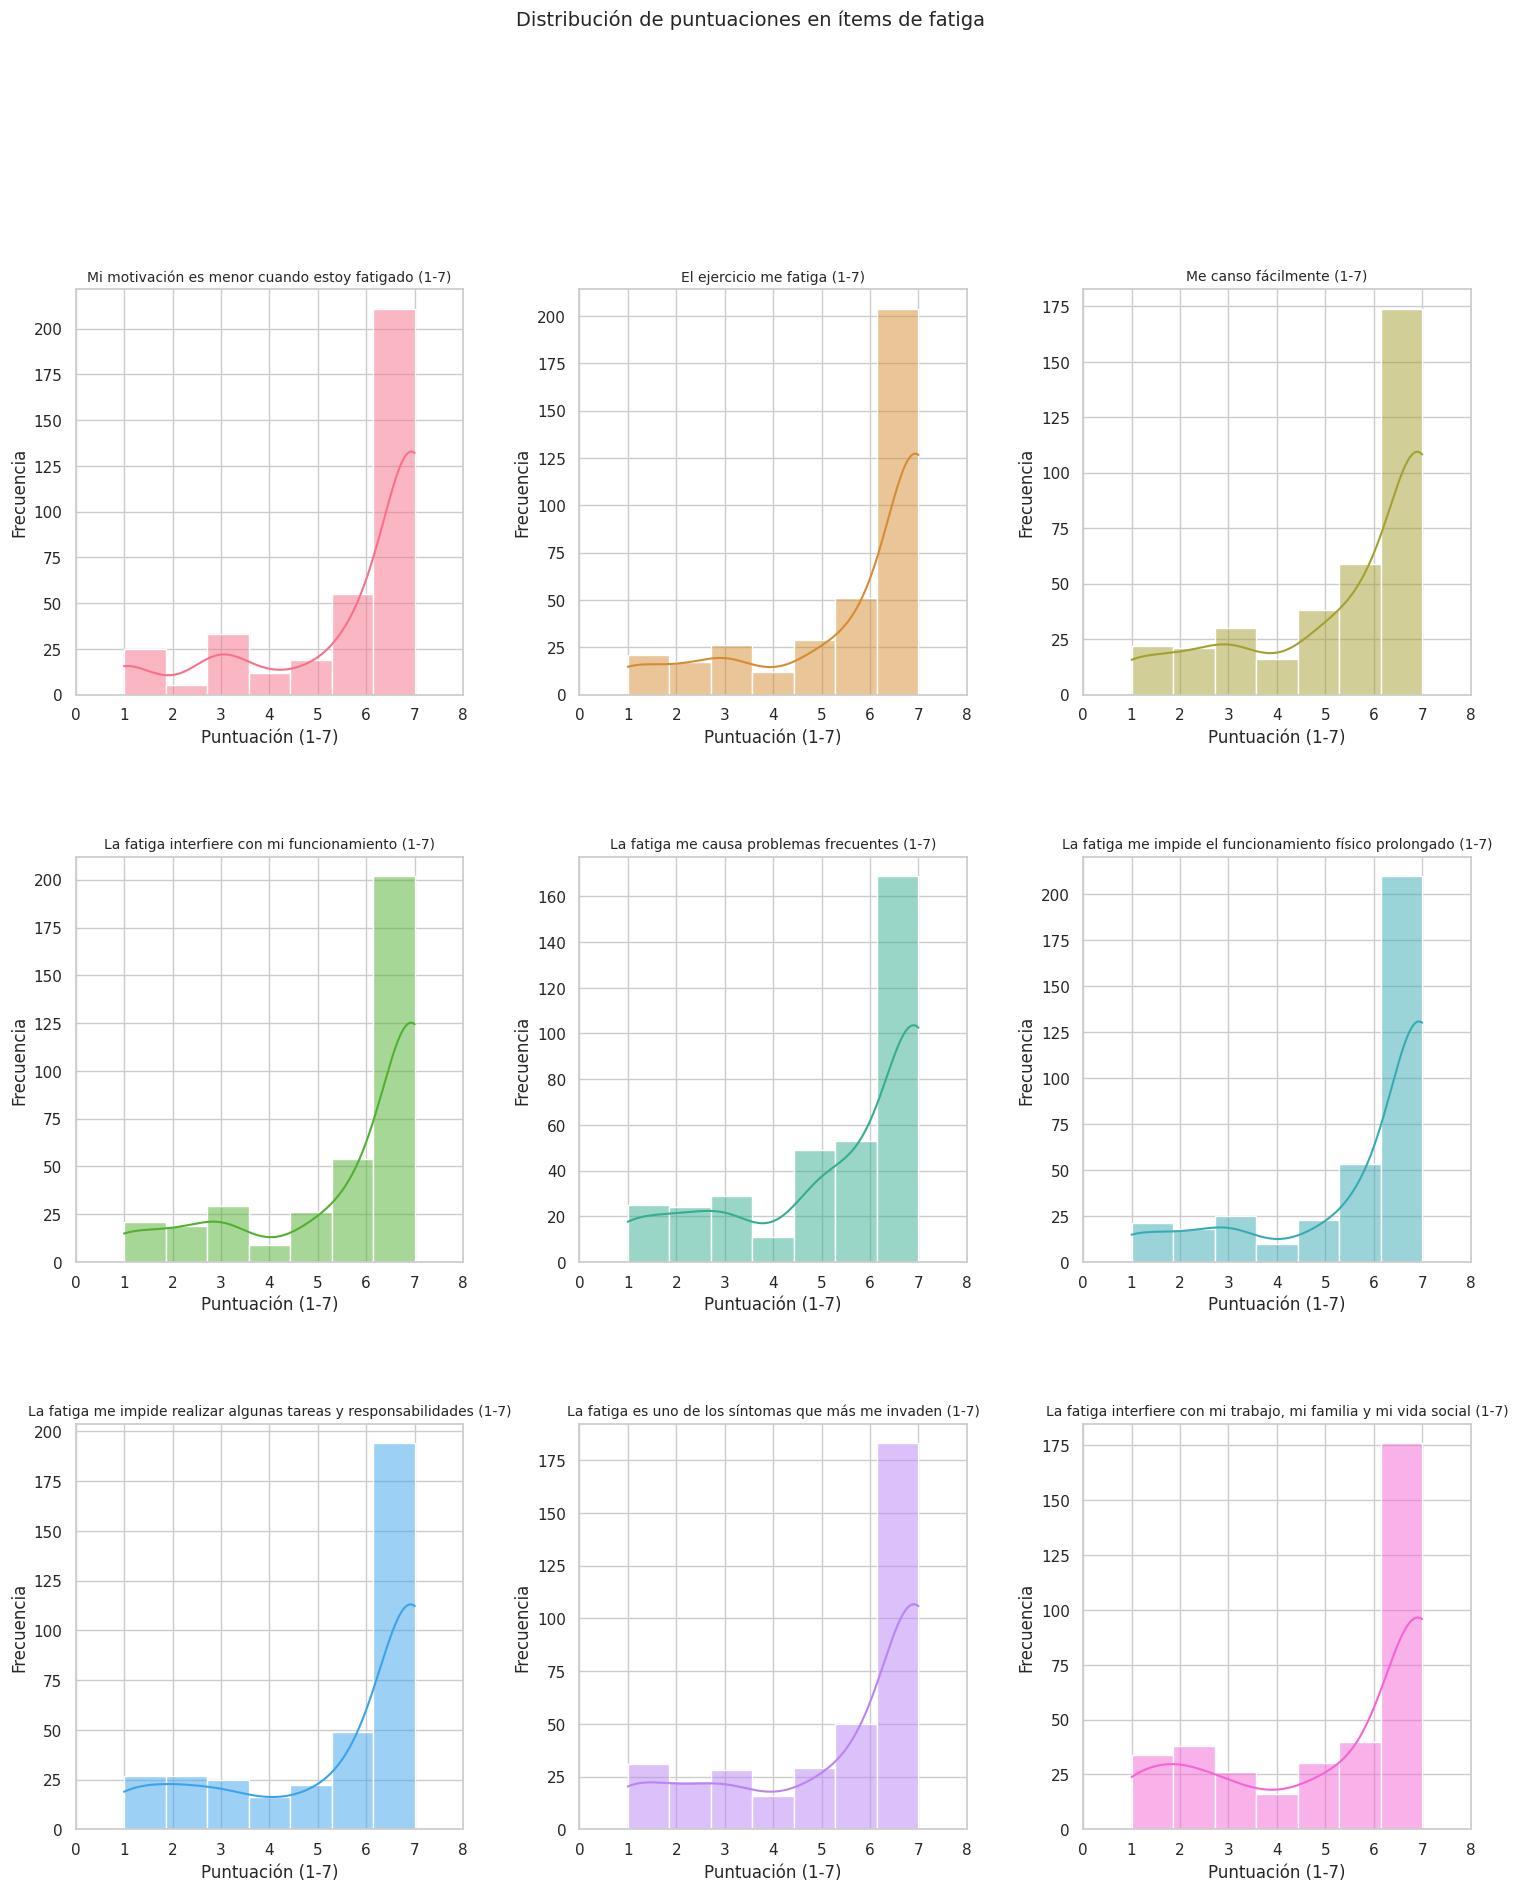


=== GRÁFICOS DE CAJA DE FATIGA ===



/tmp/ipython-input-5-621853161.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_melted, x='Ítem', y='Puntuación', palette=palette)


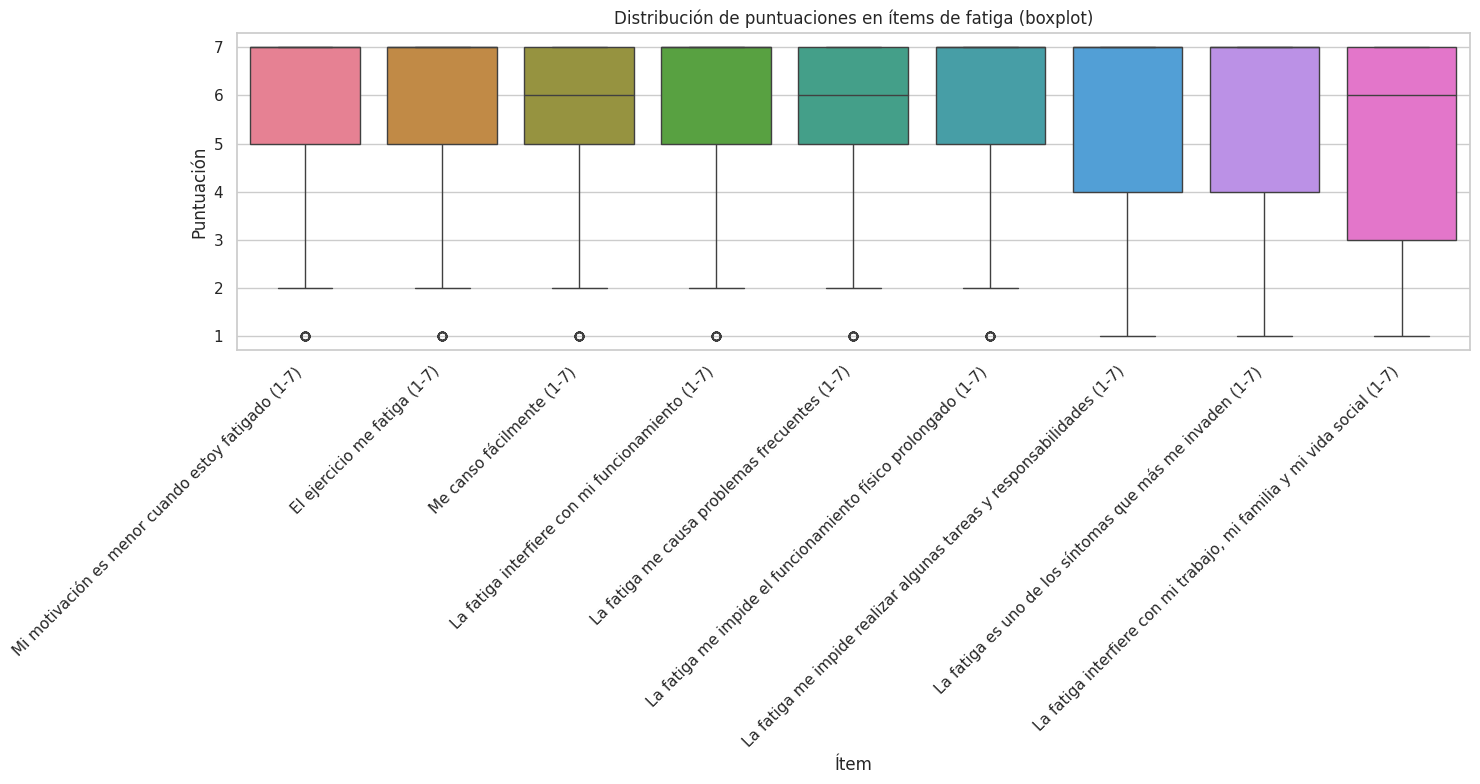


=== COMPARACIÓN DE MEDIAS ===

ANOVA para todos los ítems: F = 3.55, p = 0.0004

Resultados del test post-hoc de Tukey:
                                                                Multiple Comparison of Means - Tukey HSD, FWER=0.05                                                                 
                                group1                                                                 group2                                 meandiff p-adj   lower   upper  reject
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
                                          El ejercicio me fatiga (1-7)              La fatiga es uno de los síntomas que más me invaden (1-7)   0.3389 0.3455 -0.1195  0.7973  False
                                          El ejercicio me fatiga (1-7)                       La fatiga interfiere con mi funcionamiento (1-7)   0.5972 0.00

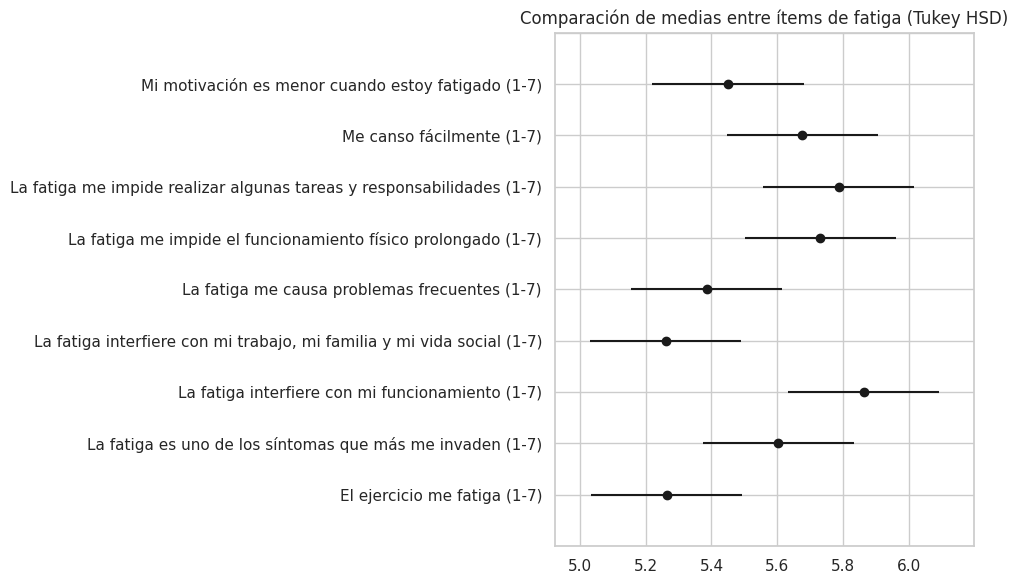


=== MATRIZ DE MEDIAS ===



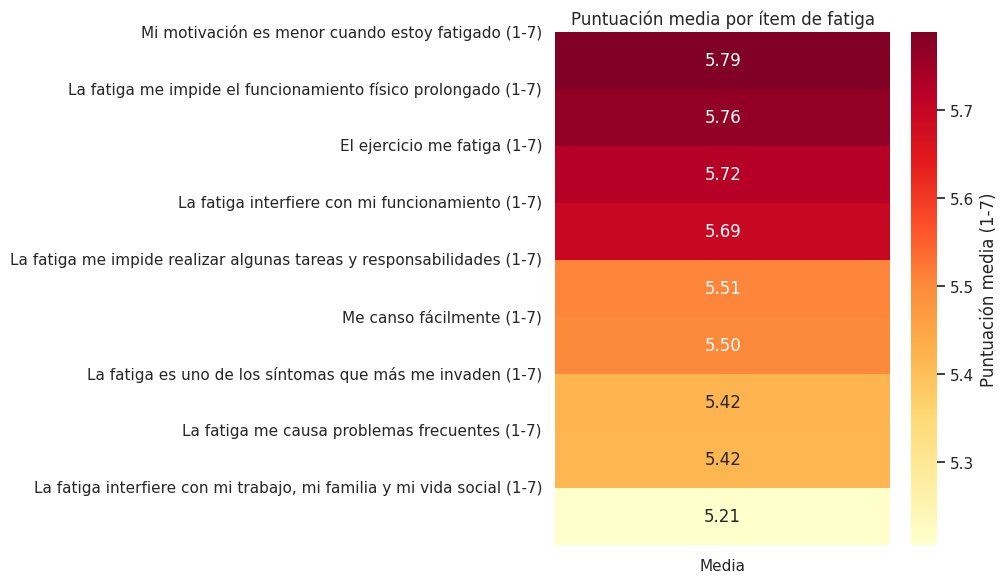

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import matplotlib.gridspec as gridspec

# Configuración estética
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (15, 10)
palette = sns.color_palette("husl", 9)

# Cargar datos (ajusta esto según tu archivo real)
df = pd.read_excel(r'/content/drive/MyDrive/Colab Notebooks/percepcion_covid_persistente.xlsx', sheet_name='Respuestas de formulario 1')

# Filtrar solo pacientes con COVID persistente (columna B = 1)
df = df[df['¿Es usted un paciente con síntomas prolongados de COVID-19?'] == 1]

# Seleccionar solo columnas de fatiga (C-K según tu descripción)
fatiga_cols = [
    'Fatiga 1. Mi motivación es menor cuando estoy fatigado (1-7)',
    'Fatiga 2. El ejercicio me fatiga (1-7)',
    'Fatiga 3. Me canso fácilmente (1-7)',
    'Fatiga 4. La fatiga interfiere con mi funcionamiento (1-7)',
    'Fatiga 5. La fatiga me causa problemas frecuentes (1-7)',
    'Fatiga 6. La fatiga me impide el funcionamiento físico prolongado (1-7)',
    'Fatiga 7. La fatiga me impide realizar algunas tareas y responsabilidades (1-7)',
    'Fatiga 8. La fatiga es uno de los síntomas que más me invaden (1-7)',
    'Fatiga 9. La fatiga interfiere con mi trabajo, mi familia y mi vida social (1-7)'
]

# Crear figura con subplots
fig = plt.figure(figsize=(18, 20))
gs = gridspec.GridSpec(3, 3, figure=fig, hspace=0.4, wspace=0.3)

# 1. Histogramas para cada ítem de fatiga
print("\n=== HISTOGRAMAS DE FATIGA ===\n")
for i, col in enumerate(fatiga_cols):
    ax = fig.add_subplot(gs[0, i % 3]) if i < 3 else fig.add_subplot(gs[1, i % 3]) if i < 6 else fig.add_subplot(gs[2, i % 3])
    sns.histplot(data=df, x=col, bins=7, kde=True, color=palette[i], ax=ax)
    title = col.split('.', 1)[1].strip() if '.' in col else col
    ax.set_title(title, fontsize=10)
    ax.set_xlabel('Puntuación (1-7)')
    ax.set_ylabel('Frecuencia')
    ax.set_xlim(0, 8)
    plt.suptitle('Distribución de puntuaciones en ítems de fatiga', y=1.02, fontsize=14)
plt.tight_layout()
plt.show()

# 2. Gráficos de caja para todos los ítems juntos
print("\n=== GRÁFICOS DE CAJA DE FATIGA ===\n")
plt.figure(figsize=(15, 8))
df_melted = df[fatiga_cols].melt(var_name='Ítem', value_name='Puntuación')
df_melted['Ítem'] = df_melted['Ítem'].apply(lambda x: x.split('.', 1)[1].strip() if '.' in x else x)

sns.boxplot(data=df_melted, x='Ítem', y='Puntuación', palette=palette)
plt.xticks(rotation=45, ha='right')
plt.title('Distribución de puntuaciones en ítems de fatiga (boxplot)')
plt.tight_layout()
plt.show()

# 3. Comparación de medias con ANOVA y tests post-hoc
print("\n=== COMPARACIÓN DE MEDIAS ===\n")

# ANOVA para comparar todas las medias juntas
f_value, p_value = stats.f_oneway(*[df[col] for col in fatiga_cols])
print(f"ANOVA para todos los ítems: F = {f_value:.2f}, p = {p_value:.4f}")

# Si el ANOVA es significativo, hacer tests post-hoc (Tukey)
if p_value < 0.05:
    from statsmodels.stats.multicomp import pairwise_tukeyhsd

    # Preparamos los datos para Tukey
    tukey_data = pd.DataFrame({
        'score': df[fatiga_cols].values.flatten(),
        'group': np.repeat([col.split('.', 1)[1].strip() if '.' in col else col for col in fatiga_cols], len(df))
    })

    # Realizamos el test de Tukey
    tukey_results = pairwise_tukeyhsd(tukey_data['score'], tukey_data['group'])
    print("\nResultados del test post-hoc de Tukey:")
    print(tukey_results)

    # Visualización de las comparaciones
    tukey_results.plot_simultaneous()
    plt.title('Comparación de medias entre ítems de fatiga (Tukey HSD)')
    plt.tight_layout()
    plt.show()
else:
    print("No hay diferencias significativas entre las medias de los ítems (p > 0.05)")

# 4. Matriz de medias con heatmap
print("\n=== MATRIZ DE MEDIAS ===\n")
mean_matrix = df[fatiga_cols].mean().to_frame('Media')
mean_matrix['Ítem'] = mean_matrix.index.map(lambda x: x.split('.', 1)[1].strip() if '.' in x else x)
mean_matrix = mean_matrix.sort_values('Media', ascending=False)

plt.figure(figsize=(10, 6))
sns.heatmap(mean_matrix[['Media']], annot=True, cmap='YlOrRd', fmt='.2f',
            cbar_kws={'label': 'Puntuación media (1-7)'})
plt.title('Puntuación media por ítem de fatiga')
plt.yticks(ticks=range(len(mean_matrix)), labels=mean_matrix['Ítem'], rotation=0)
plt.tight_layout()
plt.show()


=== HISTOGRAMAS DE ESTADO DE ÁNIMO ===



/tmp/ipython-input-13-1129180459.py:35: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


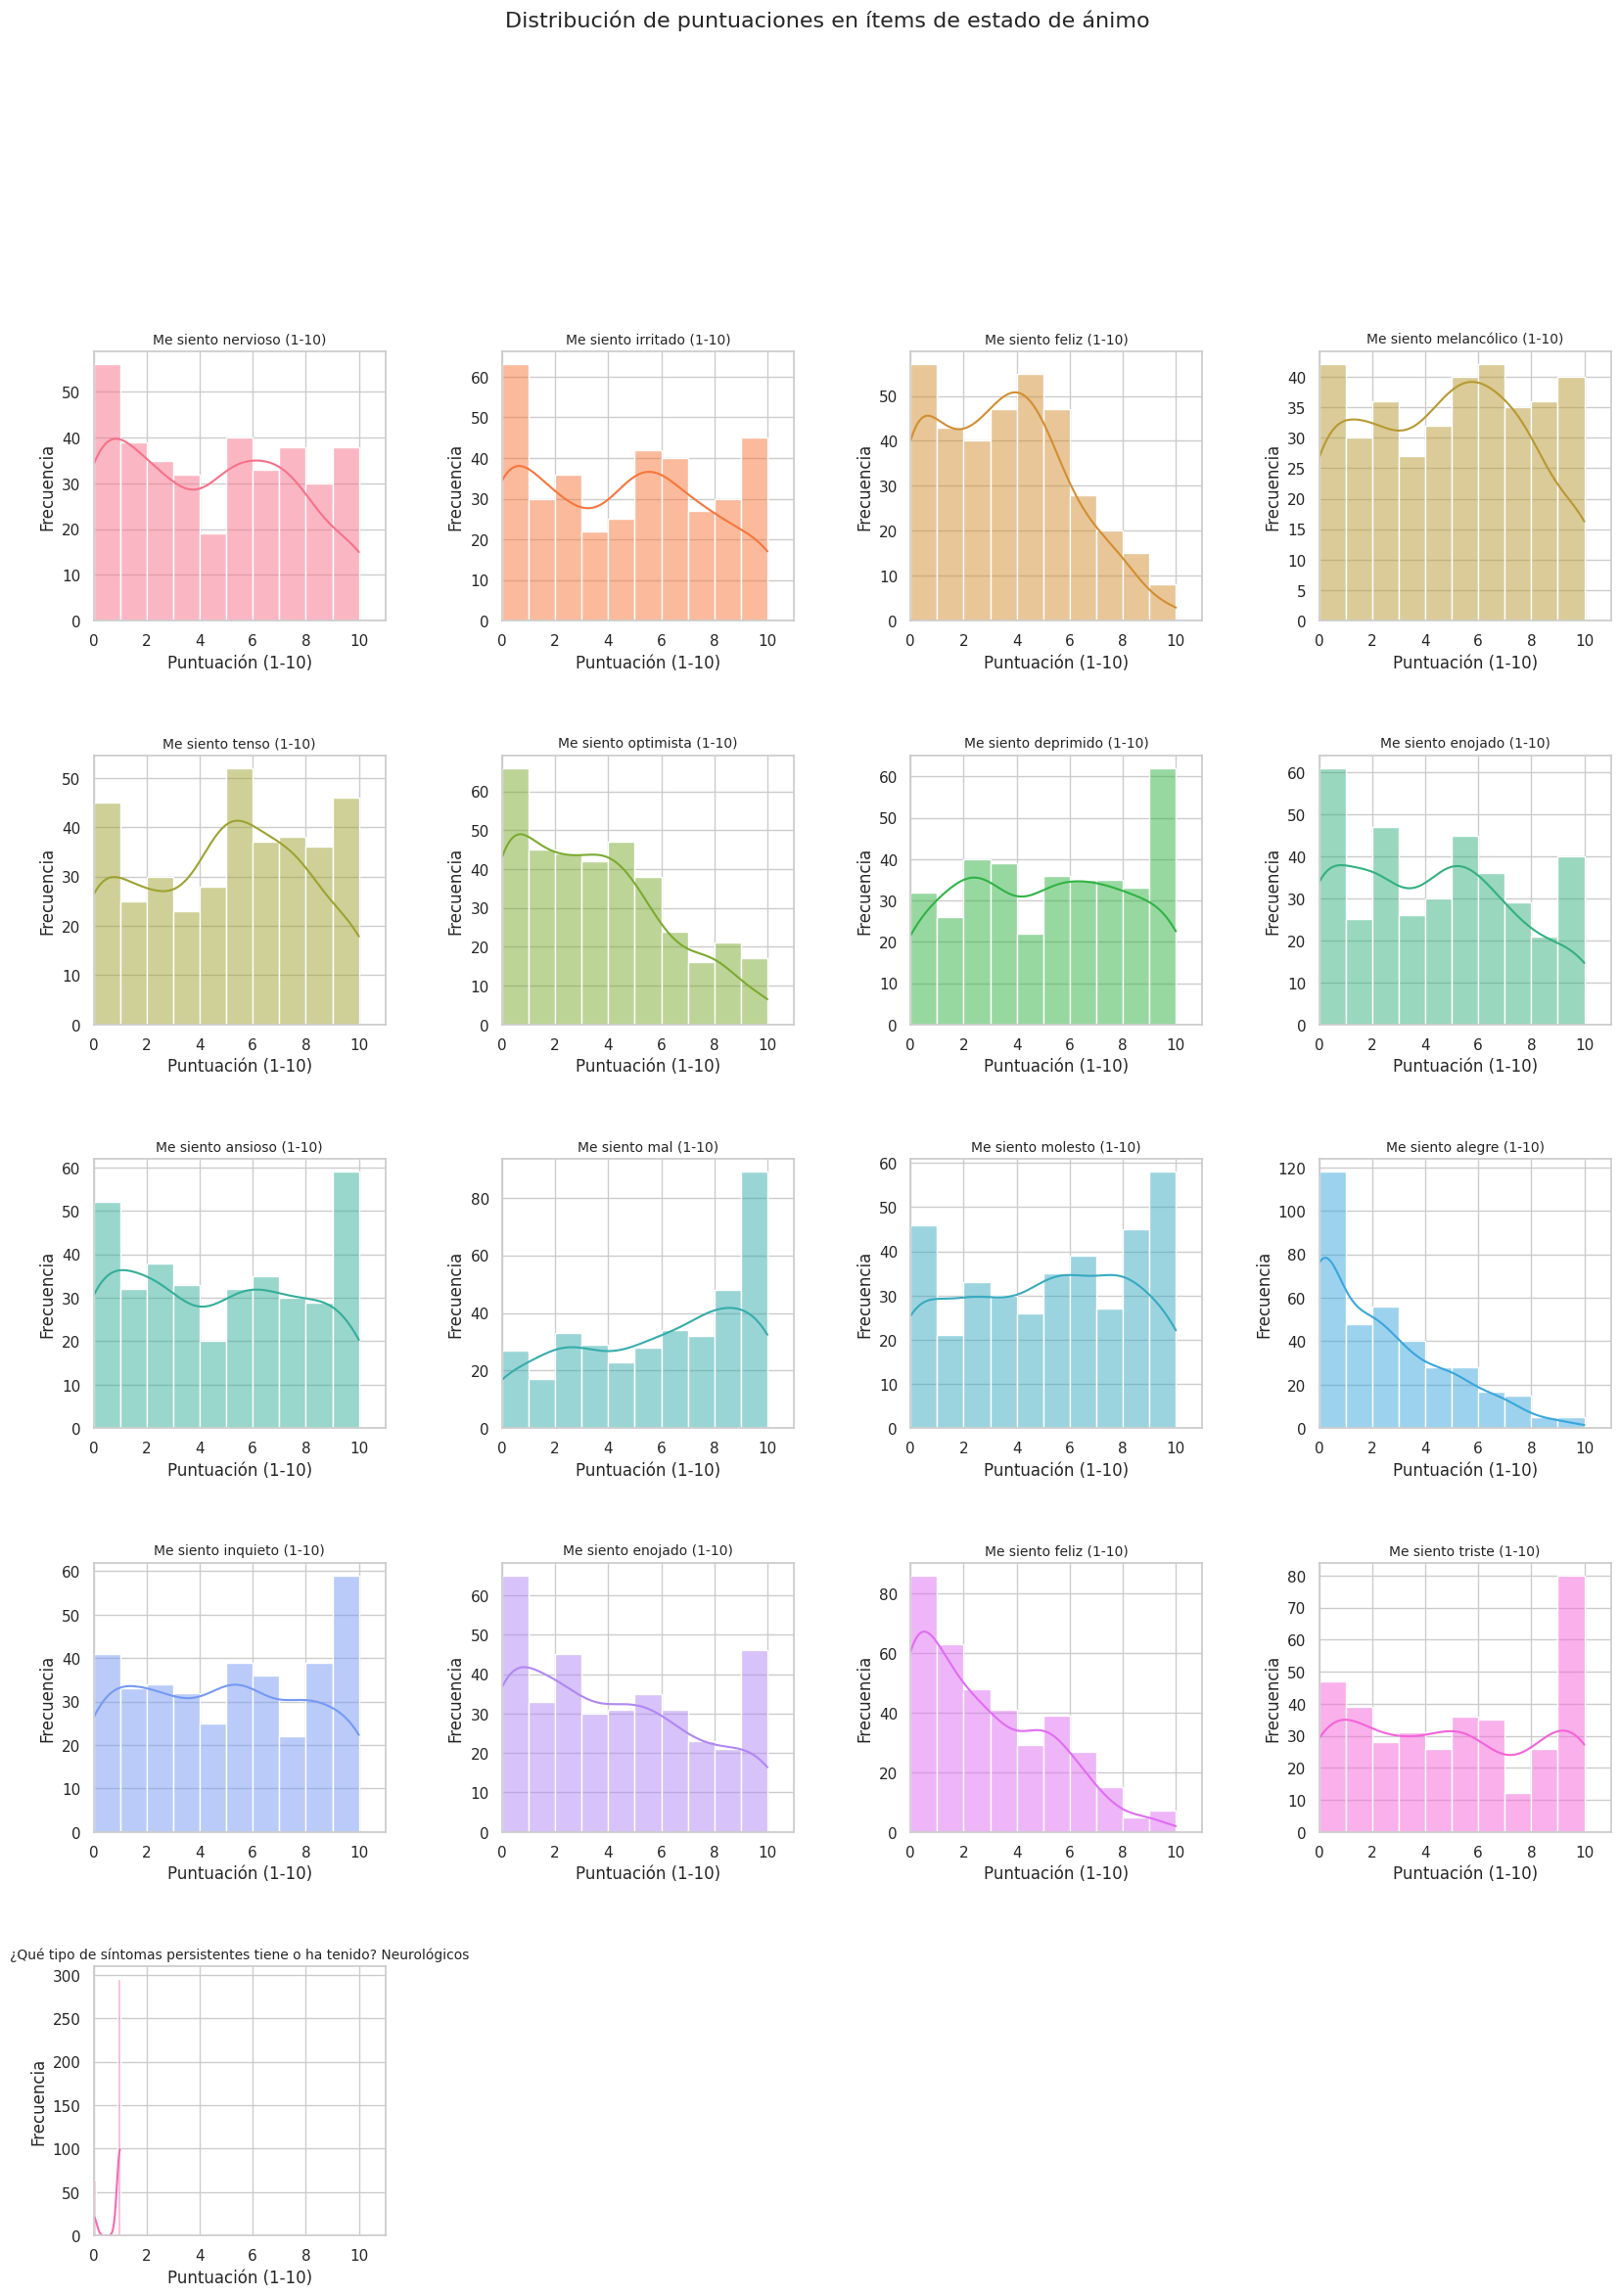


=== GRÁFICOS DE CAJA DE ESTADO DE ÁNIMO ===



/tmp/ipython-input-13-1129180459.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_melted, x='Puntuación', y='Ítem', palette='husl', orient='h')


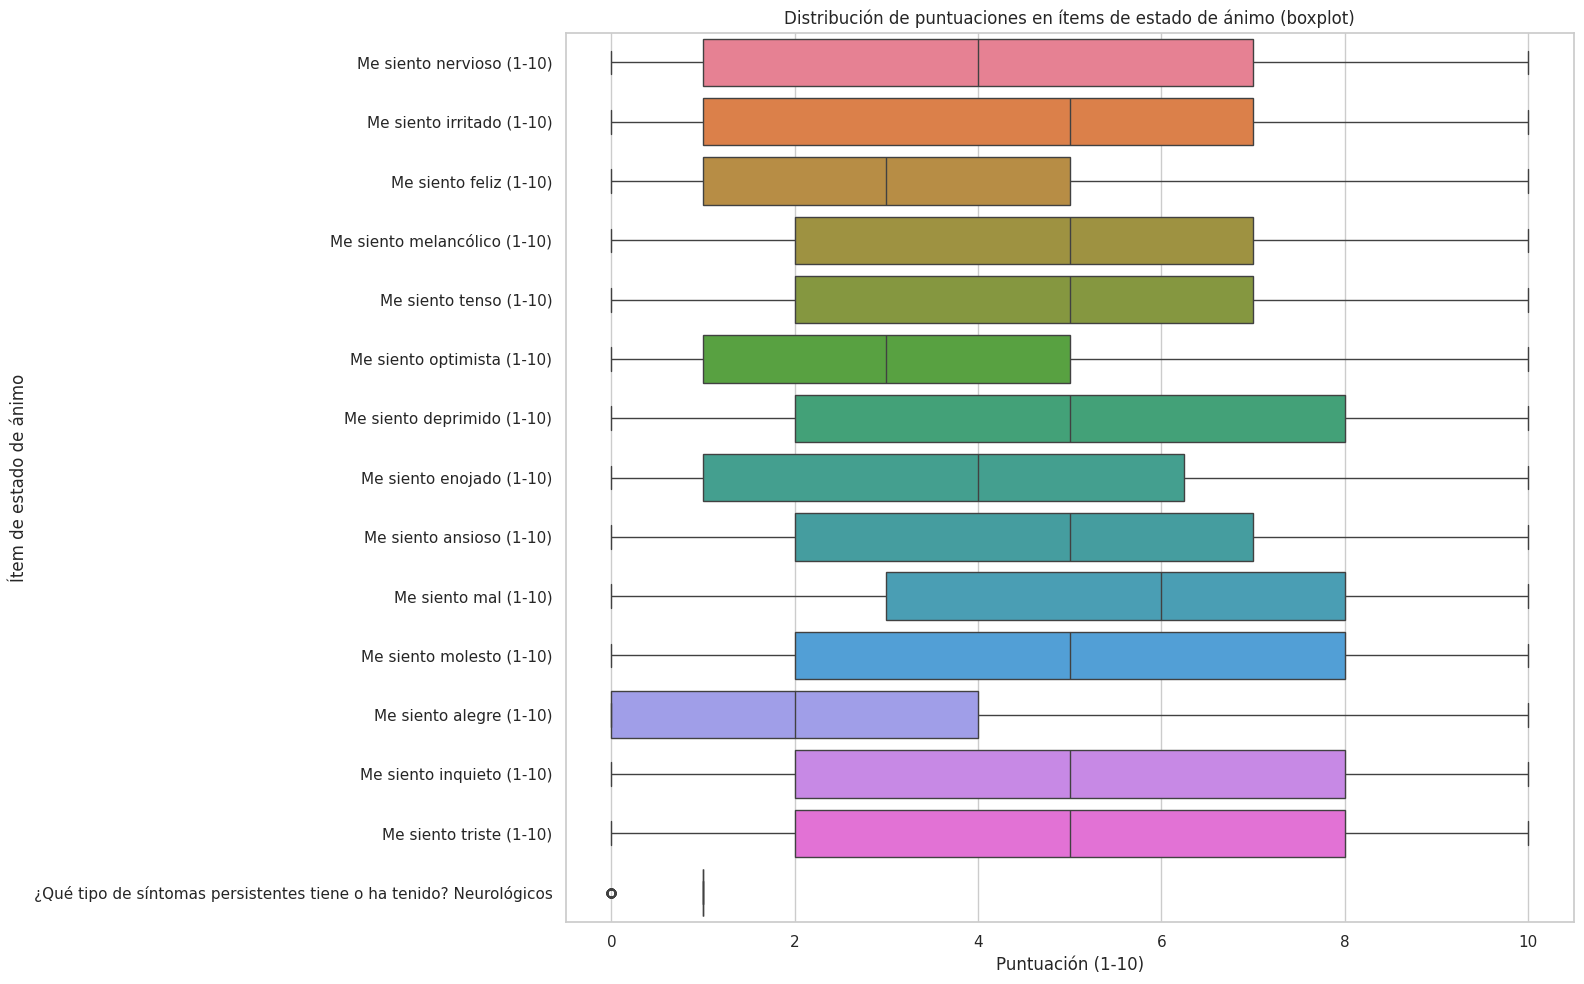


=== COMPARACIÓN ENTRE EMOCIONES POSITIVAS Y NEGATIVAS ===



/tmp/ipython-input-13-1129180459.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[['Emociones_positivas', 'Emociones_negativas']].melt(),


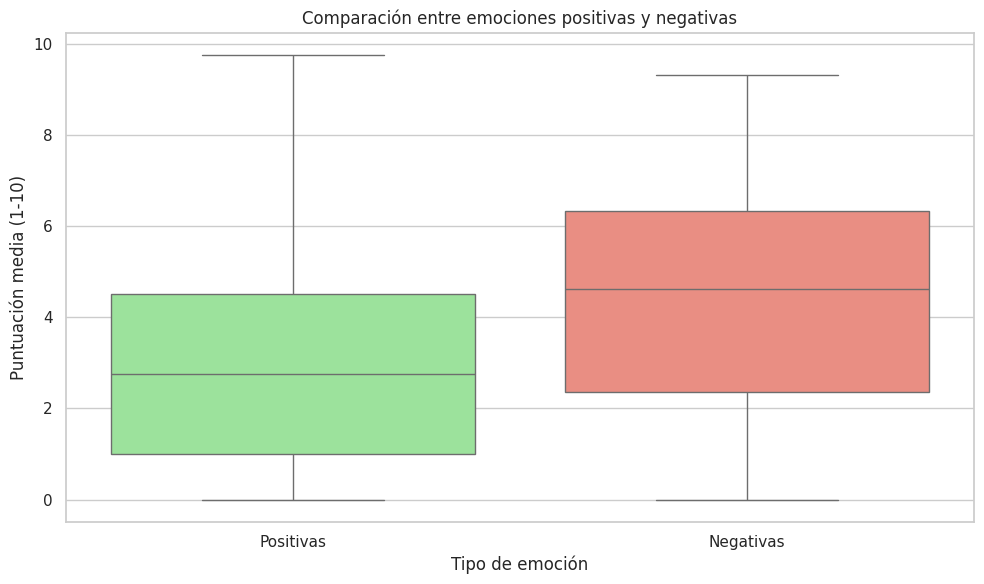


Test t para emociones positivas vs negativas: t = -8.01, p = 0.0000

=== COMPARACIÓN DE MEDIAS ENTRE TODOS LOS ÍTEMS ===

ANOVA para todos los ítems: F = 61.46, p = 0.0000


/usr/local/lib/python3.11/dist-packages/scipy/integrate/_quadpack_py.py:1264: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,



Comparaciones significativas (p < 0.05):
                                     Multiple Comparison of Means - Tukey HSD, FWER=0.05                                      
       group1                                      group2                               meandiff p-adj   lower   upper  reject
------------------------------------------------------------------------------------------------------------------------------
Me siento alegre (1-                                               Me siento ansioso (1   2.3139    0.0  1.5688   3.059   True
Me siento alegre (1-                                               Me siento deprimido    2.7139    0.0  1.9688   3.459   True
Me siento alegre (1-                                               Me siento enojado (1   1.8431    0.0  1.1978  2.4884   True
Me siento alegre (1-                                               Me siento feliz (1-1   0.7444  0.008  0.0991  1.3897   True
Me siento alegre (1-                                               Me

<Figure size 1200x800 with 0 Axes>

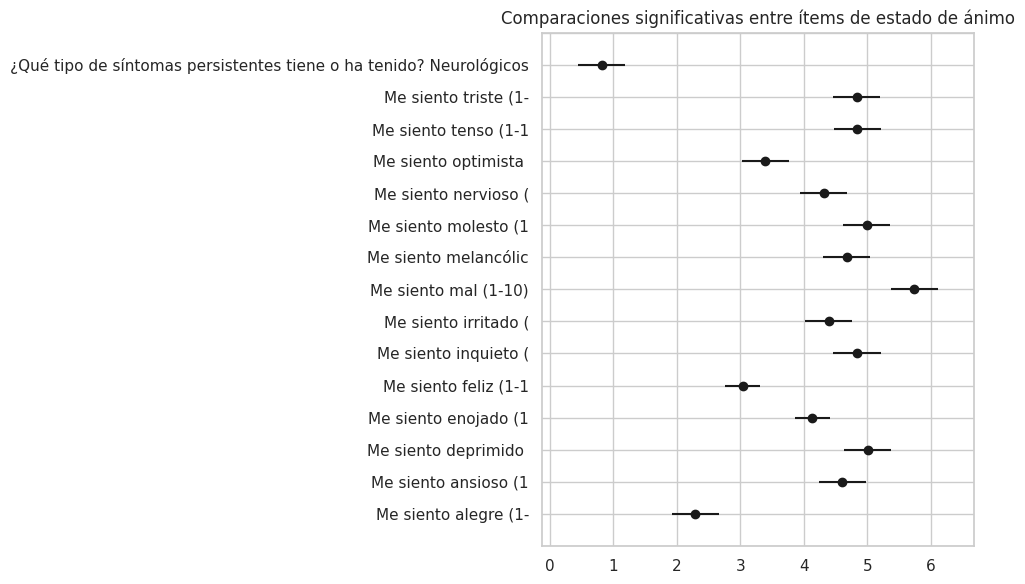

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import matplotlib.gridspec as gridspec
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Configuración estética
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (18, 24)
palette = sns.color_palette("husl", 17)

# Seleccionar columnas de estado de ánimo (L-AA), son 17 columnas
animo_cols = df.columns[11:28]

# Crear figura con subplots para histogramas
print("\n=== HISTOGRAMAS DE ESTADO DE ÁNIMO ===\n")
fig = plt.figure(figsize=(20, 25))
gs = gridspec.GridSpec(5, 4, figure=fig, hspace=0.5, wspace=0.4)

for i, col in enumerate(animo_cols):
    ax = fig.add_subplot(gs[i//4, i%4])
    sns.histplot(data=df, x=col, bins=10, kde=True, color=palette[i], ax=ax)
    if '.' in col:
        short_title = col.split('.')[1].strip()[:30]
    else:
        short_title = col
    ax.set_title(short_title, fontsize=10)
    ax.set_xlabel('Puntuación (1-10)')
    ax.set_ylabel('Frecuencia')
    ax.set_xlim(0, 11)

plt.suptitle('Distribución de puntuaciones en ítems de estado de ánimo', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

# 2. Gráficos de caja para todos los ítems juntos
print("\n=== GRÁFICOS DE CAJA DE ESTADO DE ÁNIMO ===\n")
plt.figure(figsize=(16, 10))

# Preparar datos para boxplot
df_melted = df[animo_cols].melt(var_name='Ítem', value_name='Puntuación')
df_melted['Ítem'] = df_melted['Ítem'].apply(lambda x: x.split('.')[1].strip() if '.' in x else x)

sns.boxplot(data=df_melted, x='Puntuación', y='Ítem', palette='husl', orient='h')
plt.title('Distribución de puntuaciones en ítems de estado de ánimo (boxplot)')
plt.xlabel('Puntuación (1-10)')
plt.ylabel('Ítem de estado de ánimo')
plt.tight_layout()
plt.show()

# 3. Agrupar ítems por tipo de emoción (positiva/negativa)
print("\n=== COMPARACIÓN ENTRE EMOCIONES POSITIVAS Y NEGATIVAS ===\n")

# Identificar ítems positivos y negativos (basado en el contenido)
positive_keywords = ['feliz', 'optimista', 'alegre']
positivos = [i for i, col in enumerate(animo_cols) if any(keyword in col.lower() for keyword in positive_keywords)]
negativos = [i for i in range(len(animo_cols)) if i not in positivos]

# Crear columnas compuestas
df['Emociones_positivas'] = df[[animo_cols[i] for i in positivos]].mean(axis=1)
df['Emociones_negativas'] = df[[animo_cols[i] for i in negativos]].mean(axis=1)

# Gráfico de comparación
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Emociones_positivas', 'Emociones_negativas']].melt(),
            x='variable', y='value', palette=['lightgreen', 'salmon'])
plt.title('Comparación entre emociones positivas y negativas')
plt.xlabel('Tipo de emoción')
plt.ylabel('Puntuación media (1-10)')
plt.xticks([0, 1], ['Positivas', 'Negativas'])
plt.tight_layout()
plt.show()

# Test t para comparar medias
t_stat, p_val = stats.ttest_rel(df['Emociones_positivas'], df['Emociones_negativas'])
print(f"\nTest t para emociones positivas vs negativas: t = {t_stat:.2f}, p = {p_val:.4f}")

# 4. Comparación de medias con ANOVA y tests post-hoc para todos los ítems
print("\n=== COMPARACIÓN DE MEDIAS ENTRE TODOS LOS ÍTEMS ===\n")

# ANOVA para comparar todas las medias juntas
f_value, p_value = stats.f_oneway(*[df[col].dropna() for col in animo_cols]) # Drop NA for safety
print(f"ANOVA para todos los ítems: F = {f_value:.2f}, p = {p_value:.4f}")

# Si el ANOVA es significativo, hacer tests post-hoc (Tukey)
if p_value < 0.05:
    # Preparamos los datos para Tukey
    tukey_data = pd.DataFrame({
        'score': np.concatenate([df[col].dropna() for col in animo_cols]),
        'group': np.repeat([col.split('.')[1].strip()[:20] if '.' in col else col for col in animo_cols], [len(df[col].dropna()) for col in animo_cols])
    })

    # Realizamos el test de Tukey
    tukey_results = pairwise_tukeyhsd(tukey_data['score'], tukey_data['group'])

    # Mostrar solo las comparaciones significativas
    print("\nComparaciones significativas (p < 0.05):")
    print(tukey_results)

    # Visualización de las comparaciones
    plt.figure(figsize=(12, 8))
    tukey_results.plot_simultaneous()
    plt.title('Comparaciones significativas entre ítems de estado de ánimo')
    plt.tight_layout()
    plt.show()


=== FRECUENCIA INDIVIDUAL DE SÍNTOMAS ===

                            Frecuencia  Porcentaje
Dolor                              280   77.777778
Respiratorios                      236   65.555556
Psicológicos o emocionales         215   59.722222
Locomotora                         198   55.000000
Digestivos                         197   54.722222
Otros                              148   41.111111
Dermatológicos                     135   37.500000
Cardíacos                          129   35.833333
Renal                               30    8.333333


/tmp/ipython-input-4-1125805505.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df_frecuencia.index, y='Porcentaje', data=df_frecuencia, palette=palette)
/tmp/ipython-input-4-1125805505.py:50: UserWarning: The palette list has more values (10) than needed (9), which may not be intended.
  ax = sns.barplot(x=df_frecuencia.index, y='Porcentaje', data=df_frecuencia, palette=palette)


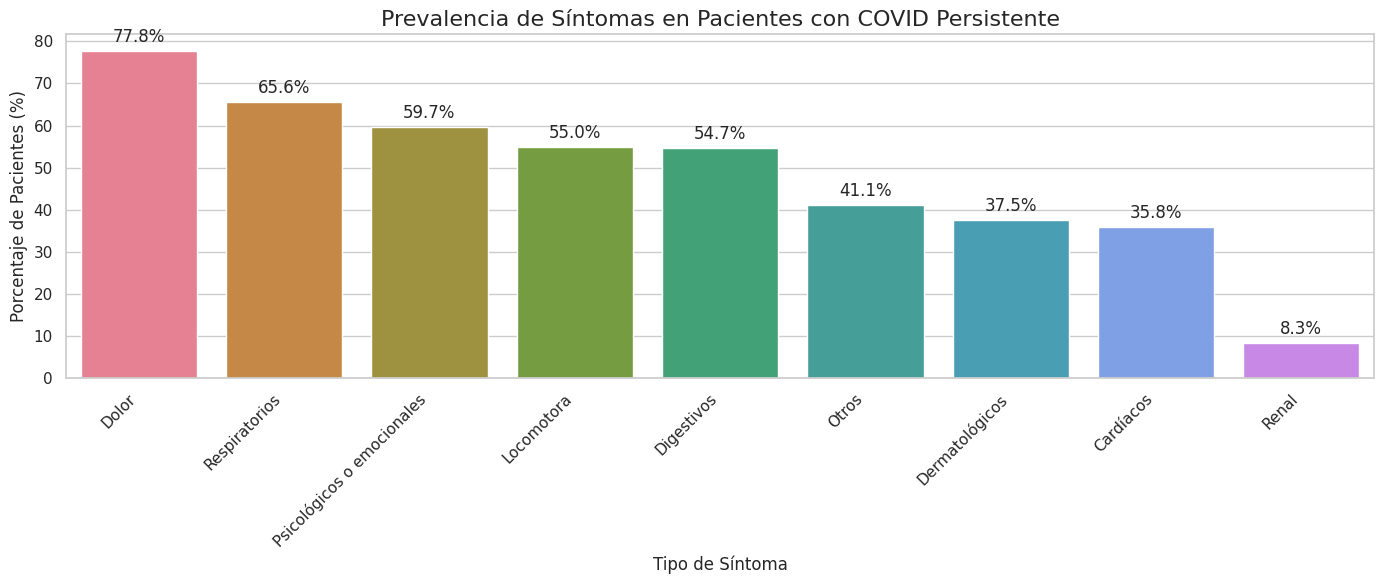


=== COMBINACIONES FRECUENTES DE SÍNTOMAS (PARES) ===

Pares de síntomas más frecuentes:
Dolor + Respiratorios: 197 pacientes (54.7%)
Dolor + Locomotora: 182 pacientes (50.6%)
Dolor + Psicológicos o emocionales: 178 pacientes (49.4%)
Digestivos + Dolor: 167 pacientes (46.4%)
Locomotora + Respiratorios: 149 pacientes (41.4%)
Psicológicos o emocionales + Respiratorios: 147 pacientes (40.8%)
Digestivos + Respiratorios: 138 pacientes (38.3%)
Locomotora + Psicológicos o emocionales: 129 pacientes (35.8%)
Digestivos + Psicológicos o emocionales: 128 pacientes (35.6%)
Dolor + Otros: 126 pacientes (35.0%)


/tmp/ipython-input-4-1125805505.py:93: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Combinación', y='Porcentaje', data=df_pares, palette='viridis')


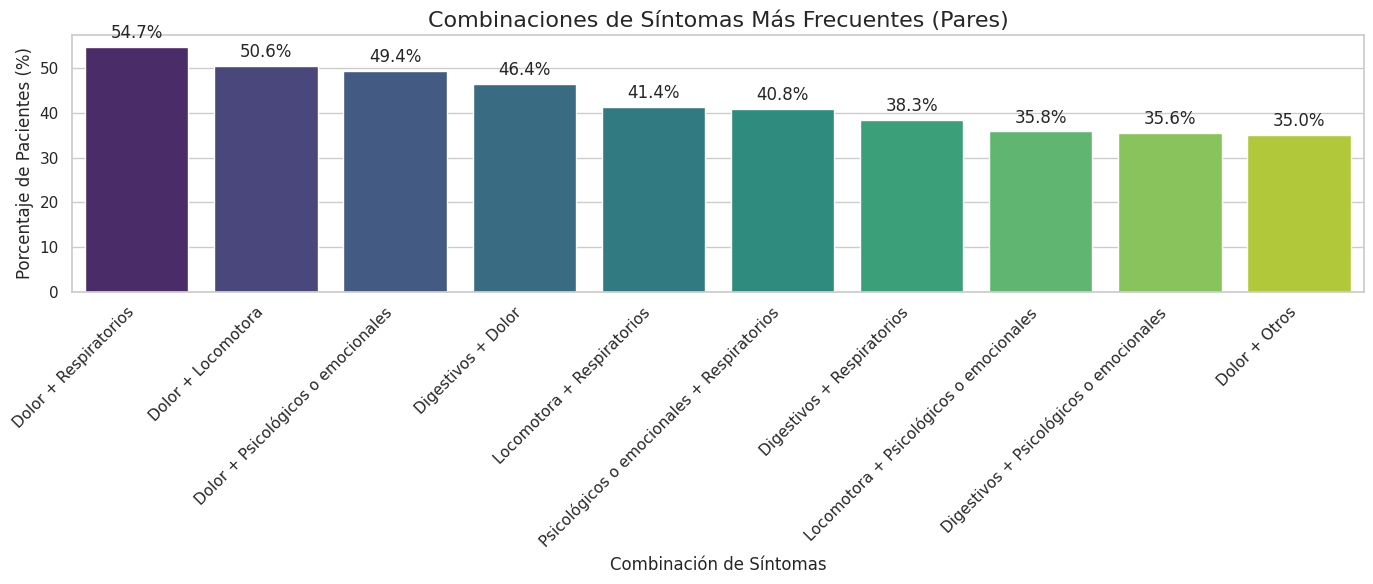


=== REGLAS DE ASOCIACIÓN ENTRE SÍNTOMAS ===

Reglas de asociación más relevantes:
                                            antecedents  \
1609  (Dermatológicos, Locomotora, Cardíacos, Digest...   
1338            (Locomotora, Cardíacos, Dermatológicos)   
404   (Psicológicos o emocionales, Cardíacos, Dermat...   
1164  (Psicológicos o emocionales, Cardíacos, Dermat...   
1194  (Psicológicos o emocionales, Cardíacos, Dermat...   
1189  (Psicológicos o emocionales, Cardíacos, Dermat...   
697          (Cardíacos, Dermatológicos, Respiratorios)   
1423  (Dolor, Cardíacos, Dermatológicos, Respiratorios)   
1426            (Dermatológicos, Cardíacos, Digestivos)   
1548  (Psicológicos o emocionales, Locomotora, Cardí...   

                 consequents   support  confidence      lift  
1609  (Dolor, Respiratorios)  0.100000    0.947368  1.731232  
1338  (Dolor, Respiratorios)  0.113889    0.911111  1.664975  
404             (Digestivos)  0.100000    0.900000  1.644670  
1164  (Dolor, R

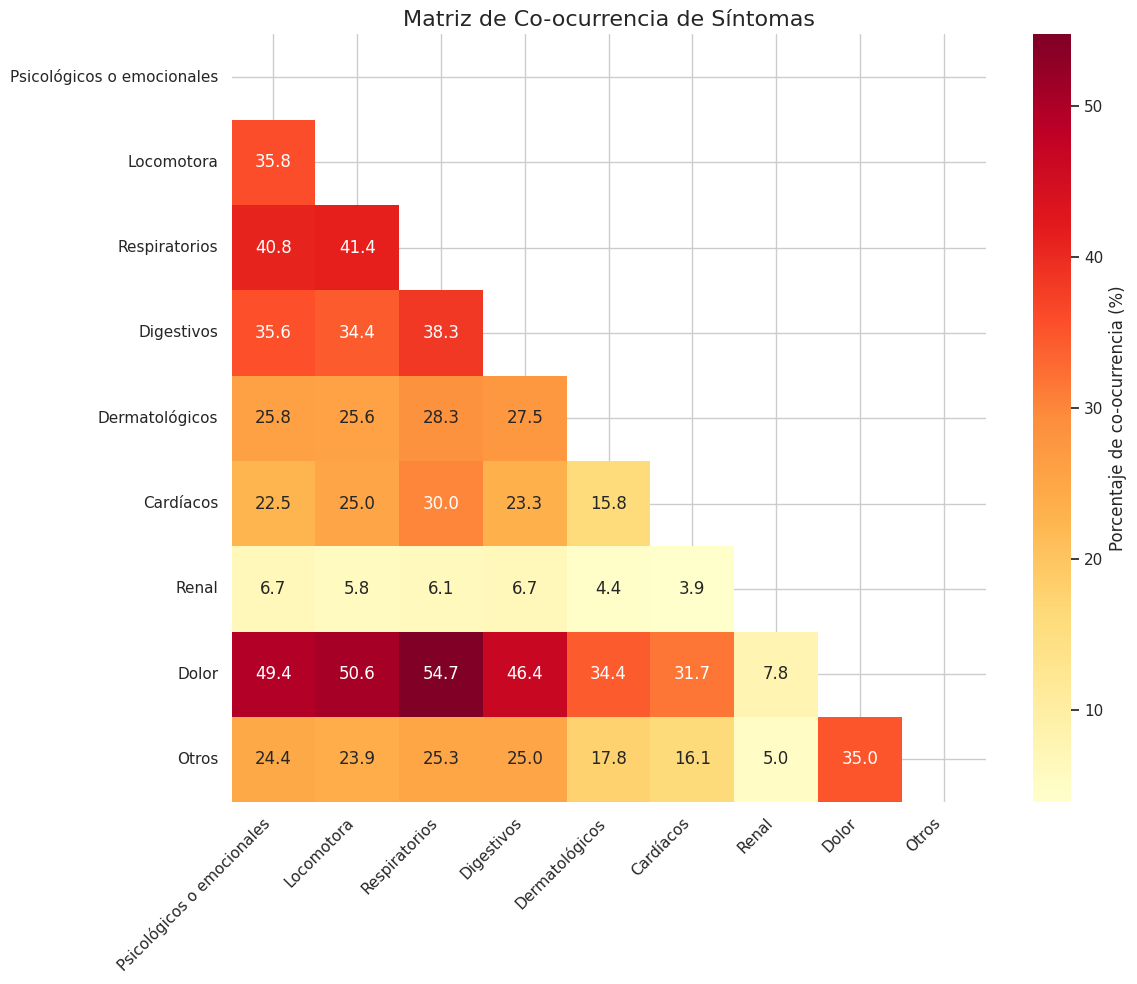


=== NÚMERO DE SÍNTOMAS POR PACIENTE ===



/tmp/ipython-input-4-1125805505.py:162: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Total_síntomas', data=df_sintomas, palette='Blues_r')


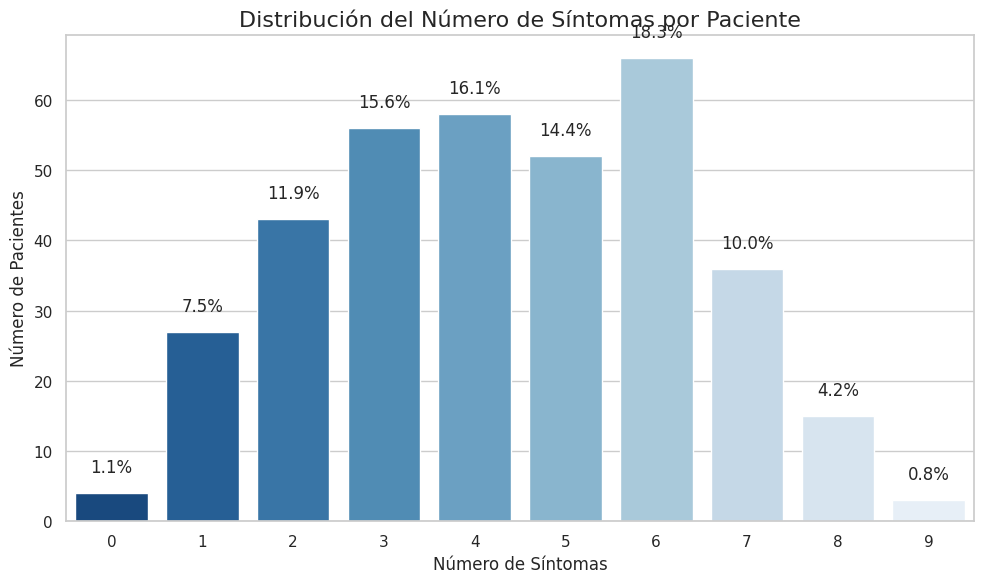

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from collections import Counter
from mlxtend.frequent_patterns import apriori, association_rules

# Cargar datos (ajusta esto según tu archivo real)
df = pd.read_excel(r'/content/drive/MyDrive/Colab Notebooks/percepcion_covid_persistente.xlsx', sheet_name='Respuestas de formulario 1')

# Filtrar solo pacientes con COVID persistente (columna B = 1)
df = df[df['¿Es usted un paciente con síntomas prolongados de COVID-19?'] == 1]

# Configuración visual
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)
palette = sns.color_palette("husl", 10)

# 1. Preparación de datos
# Seleccionar columnas de síntomas de forma dinámica para evitar KeyErrors
sintomas_cols_long = df.columns[28:]
df_sintomas = df[sintomas_cols_long].copy()

# Limpiar los nombres de las columnas para facilitar su uso y mejorar los gráficos
def clean_col_name(col_name):
    prefix = '¿Qué tipo de síntomas persistentes tiene o ha tenido? '
    name = col_name.replace(prefix, '').replace('.', '')
    return name

df_sintomas.columns = [clean_col_name(col) for col in df_sintomas.columns]

# La lista de síntomas ahora contiene los nombres limpios
sintomas_cols = list(df_sintomas.columns)

# 2. Frecuencia individual de síntomas
print("\n=== FRECUENCIA INDIVIDUAL DE SÍNTOMAS ===\n")
frecuencia_sintomas = df_sintomas.sum().sort_values(ascending=False)
porcentaje_sintomas = (frecuencia_sintomas / len(df)) * 100

# Crear DataFrame con los resultados
df_frecuencia = pd.DataFrame({
    'Frecuencia': frecuencia_sintomas,
    'Porcentaje': porcentaje_sintomas
})
print(df_frecuencia)

# Gráfico de frecuencia de síntomas (ahora con etiquetas limpias)
plt.figure(figsize=(14, 6))
ax = sns.barplot(x=df_frecuencia.index, y='Porcentaje', data=df_frecuencia, palette=palette)
plt.title('Prevalencia de Síntomas en Pacientes con COVID Persistente', fontsize=16)
plt.ylabel('Porcentaje de Pacientes (%)')
plt.xlabel('Tipo de Síntoma')
plt.xticks(rotation=45, ha='right')

# Añadir etiquetas con los valores
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')
plt.tight_layout()
plt.show()

# 3. Combinaciones frecuentes de síntomas (pares)
print("\n=== COMBINACIONES FRECUENTES DE SÍNTOMAS (PARES) ===\n")

# Encontrar todas las combinaciones de síntomas presentes en cada paciente
combinaciones = []
for _, row in df_sintomas.iterrows():
    presentes = [sintoma for sintoma in sintomas_cols if row[sintoma] == 1]
    combinaciones.append(presentes)

# Contar combinaciones de pares de síntomas
contador_pares = Counter()
for lista_sintomas in combinaciones:
    pares = combinations(sorted(lista_sintomas), 2)
    contador_pares.update(pares)

# Mostrar los 10 pares más comunes
top_pares = contador_pares.most_common(10)
print("Pares de síntomas más frecuentes:")
for par, count in top_pares:
    print(f"{par[0]} + {par[1]}: {count} pacientes ({count/len(df)*100:.1f}%)")

# Gráfico de pares frecuentes
df_pares = pd.DataFrame(top_pares, columns=['Combinación', 'Frecuencia'])
df_pares['Combinación'] = df_pares['Combinación'].apply(lambda x: f"{x[0]} + {x[1]}")
df_pares['Porcentaje'] = (df_pares['Frecuencia'] / len(df)) * 100

plt.figure(figsize=(14, 6))
ax = sns.barplot(x='Combinación', y='Porcentaje', data=df_pares, palette='viridis')
plt.title('Combinaciones de Síntomas Más Frecuentes (Pares)', fontsize=16)
plt.ylabel('Porcentaje de Pacientes (%)')
plt.xlabel('Combinación de Síntomas')
plt.xticks(rotation=45, ha='right')

# Añadir etiquetas
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')
plt.tight_layout()
plt.show()

# 4. Análisis de asociación (reglas de asociación)
print("\n=== REGLAS DE ASOCIACIÓN ENTRE SÍNTOMAS ===\n")

# Convertir datos a formato booleano para apriori
df_encoded = df_sintomas.astype(bool)

# Aplicar algoritmo Apriori para encontrar itemsets frecuentes
frequent_itemsets = apriori(df_encoded, min_support=0.1, use_colnames=True)

# Generar reglas de asociación
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.2)

# Filtrar reglas interesantes
interesting_rules = rules[
    (rules['lift'] > 1.5) &
    (rules['confidence'] > 0.6)
].sort_values('confidence', ascending=False)

# Mostrar las reglas más relevantes
print("Reglas de asociación más relevantes:")
print(interesting_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))

# 5. Matriz de co-ocurrencia de síntomas
print("\n=== MATRIZ DE CO-OCURRENCIA DE SÍNTOMAS ===\n")

# Crear matriz de co-ocurrencia
co_occurrence = pd.DataFrame(np.zeros((len(sintomas_cols), len(sintomas_cols))),
                            index=sintomas_cols, columns=sintomas_cols)

for lista_sintomas in combinaciones:
    for a, b in combinations(sorted(lista_sintomas), 2):
        co_occurrence.loc[a, b] += 1
        co_occurrence.loc[b, a] += 1

# Convertir a porcentaje
co_occurrence_pct = (co_occurrence / len(df)) * 100

# Visualizar matriz de co-ocurrencia
plt.figure(figsize=(12, 10))
sns.heatmap(co_occurrence_pct, annot=True, fmt=".1f", cmap="YlOrRd",
            mask=np.triu(np.ones_like(co_occurrence_pct, dtype=bool)),
            cbar_kws={'label': 'Porcentaje de co-ocurrencia (%)'})
plt.title('Matriz de Co-ocurrencia de Síntomas', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# 6. Número de síntomas por paciente
print("\n=== NÚMERO DE SÍNTOMAS POR PACIENTE ===\n")
df_sintomas['Total_síntomas'] = df_sintomas.sum(axis=1)

plt.figure(figsize=(10, 6))
sns.countplot(x='Total_síntomas', data=df_sintomas, palette='Blues_r')
plt.title('Distribución del Número de Síntomas por Paciente', fontsize=16)
plt.xlabel('Número de Síntomas')
plt.ylabel('Número de Pacientes')

# Añadir porcentajes
total = len(df_sintomas)
for p in plt.gca().patches:
    height = p.get_height()
    if height > 0:
        plt.gca().text(p.get_x()+p.get_width()/2., height + 3,
                       f'{height/total*100:.1f}%', ha='center')
plt.tight_layout()
plt.show()

In [ ]:
pip install networkx scikit-learn


=== COMBINACIONES FRECUENTES DE 3 SÍNTOMAS ===

                                         Combinación  Frecuencia  Porcentaje
0                 Locomotora + Respiratorios + Dolor         140   38.888889
1  Psicológicos o emocionales + Respiratorios + D...         131   36.388889
2                 Respiratorios + Digestivos + Dolor         125   34.722222
3    Psicológicos o emocionales + Locomotora + Dolor         121   33.611111
4                    Locomotora + Digestivos + Dolor         115   31.944444
5    Psicológicos o emocionales + Digestivos + Dolor         112   31.111111
6  Psicológicos o emocionales + Locomotora + Resp...         101   28.055556
7            Locomotora + Respiratorios + Digestivos          98   27.222222
8                  Respiratorios + Cardíacos + Dolor          97   26.944444
9             Respiratorios + Dermatológicos + Dolor          96   26.666667


/tmp/ipython-input-3644313890.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Porcentaje', y='Combinación', data=df_trios.head(10), palette='rocket')


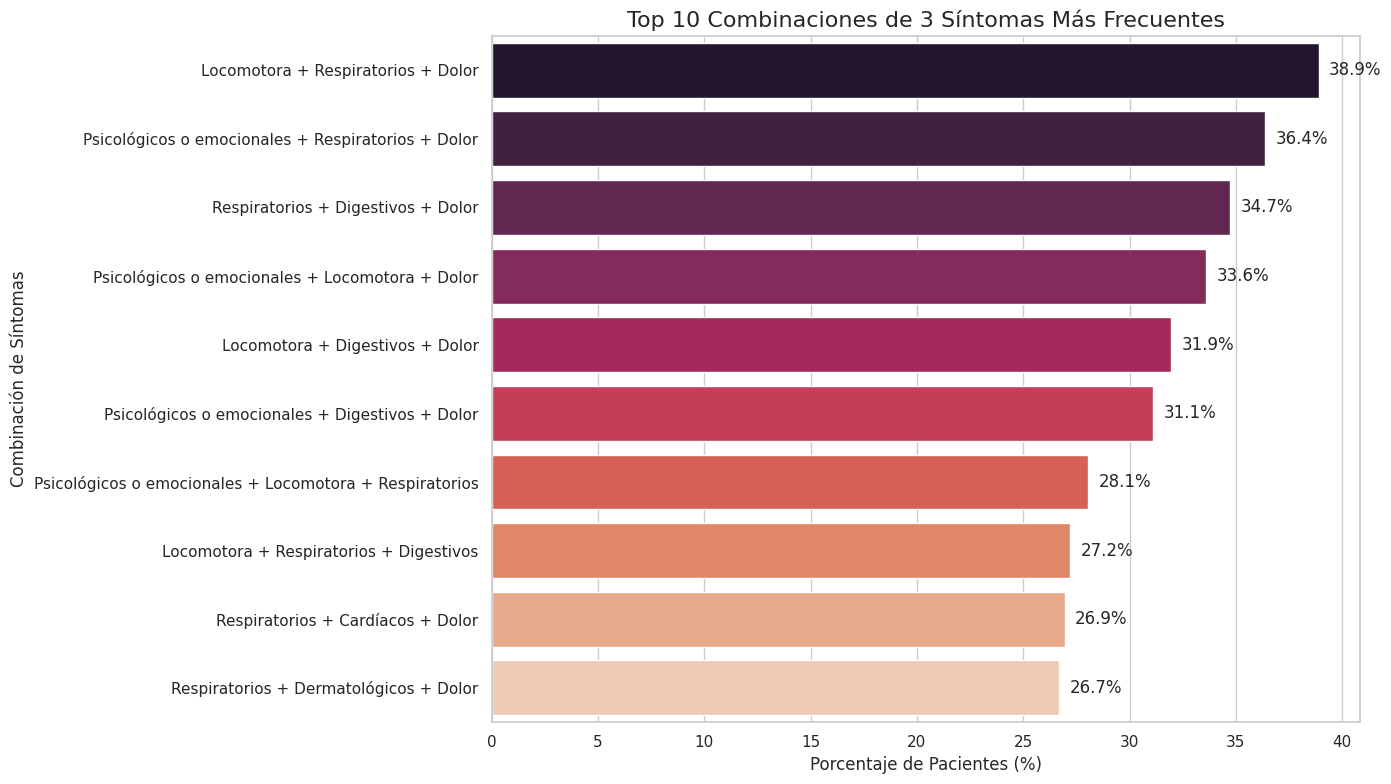


=== REGLAS DE ASOCIACIÓN PARA COMBINACIONES COMPLEJAS ===

Combinaciones frecuentes de 3 y 4 síntomas:
      support                                           itemsets  length
142  0.266667  (Locomotora, Psicológicos o emocionales, Dolor...       4
132  0.255556     (Digestivos, Locomotora, Dolor, Respiratorios)       4
135  0.230556  (Digestivos, Psicológicos o emocionales, Dolor...       4
131  0.222222  (Digestivos, Psicológicos o emocionales, Dolor...       4
110  0.216667      (Dolor, Locomotora, Cardíacos, Respiratorios)       4
119  0.202778  (Dolor, Dermatológicos, Digestivos, Respirator...       4
103  0.197222      (Dolor, Digestivos, Cardíacos, Respiratorios)       4
125  0.197222  (Dermatológicos, Locomotora, Dolor, Respirator...       4
128  0.194444  (Dermatológicos, Psicológicos o emocionales, D...       4
118  0.183333  (Dermatológicos, Psicológicos o emocionales, D...       4
138  0.183333  (Digestivos, Locomotora, Psicológicos o emocio...       4
113  0.180556  (Dolo

/usr/local/lib/python3.11/dist-packages/networkx/drawing/nx_pylab.py:1438: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  node_collection = ax.scatter(


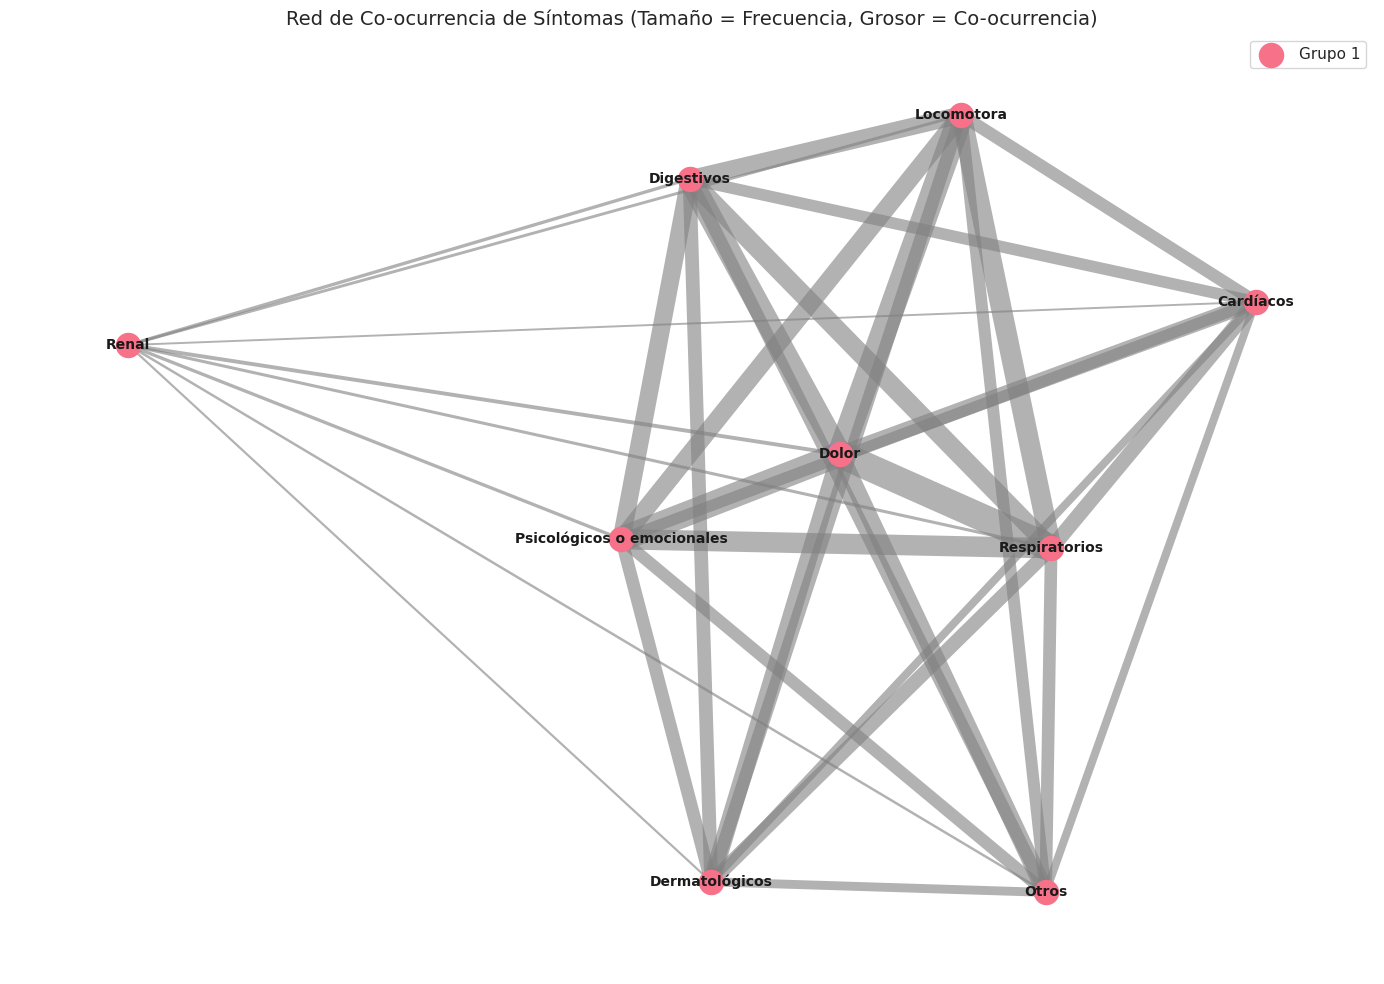


=== CLUSTERS DE PACIENTES POR PATRONES DE SÍNTOMAS ===



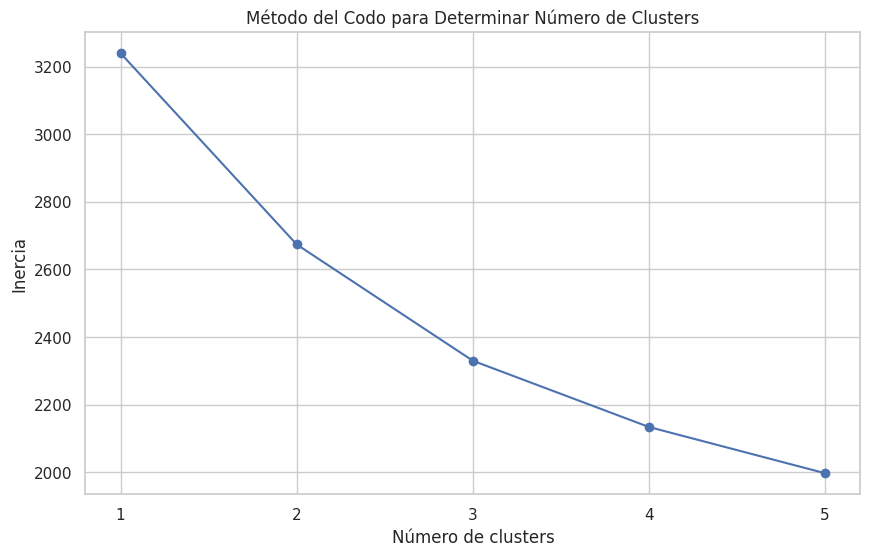

Prevalencia de síntomas por cluster:
Cluster                            0         1         2  Diferencia
Renal                       0.000000  0.000000  1.000000    1.000000
Locomotora                  0.201342  0.812155  0.700000    0.610812
Digestivos                  0.275168  0.729282  0.800000    0.524832
Dolor                       0.503356  0.977901  0.933333    0.474545
Dermatológicos              0.100671  0.574586  0.533333    0.473914
Respiratorios               0.416107  0.839779  0.733333    0.423672
Psicológicos o emocionales  0.409396  0.718232  0.800000    0.390604
Cardíacos                   0.167785  0.497238  0.466667    0.329452
Otros                       0.322148  0.453039  0.600000    0.277852


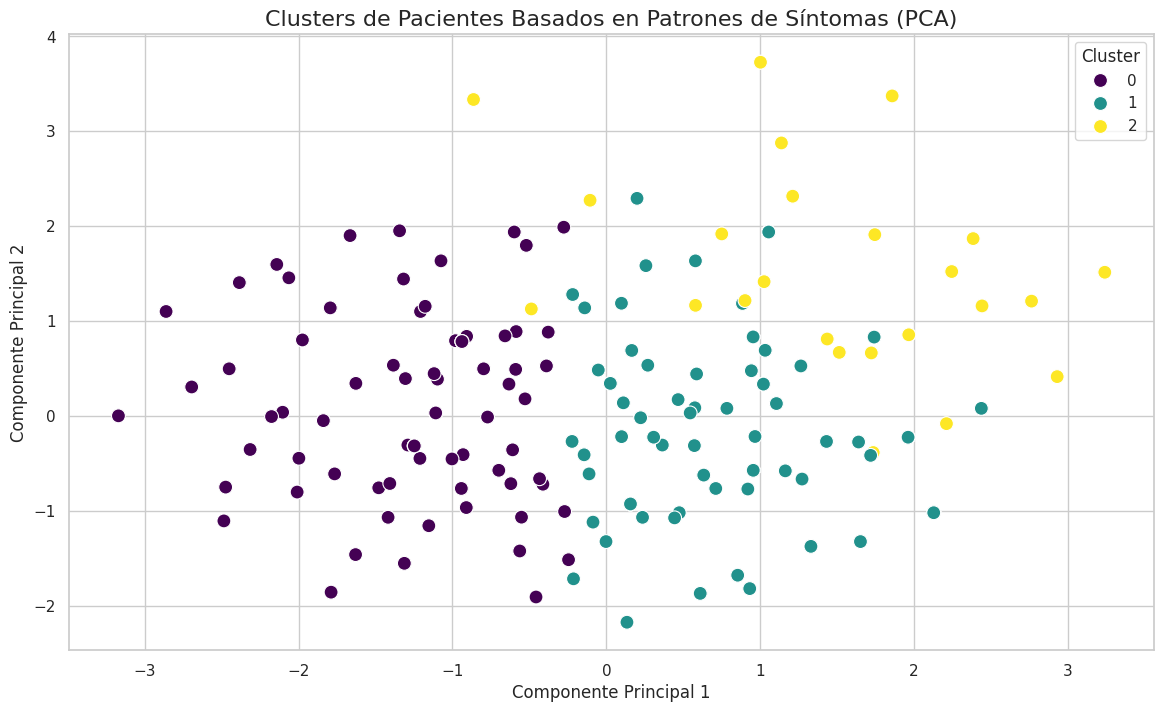

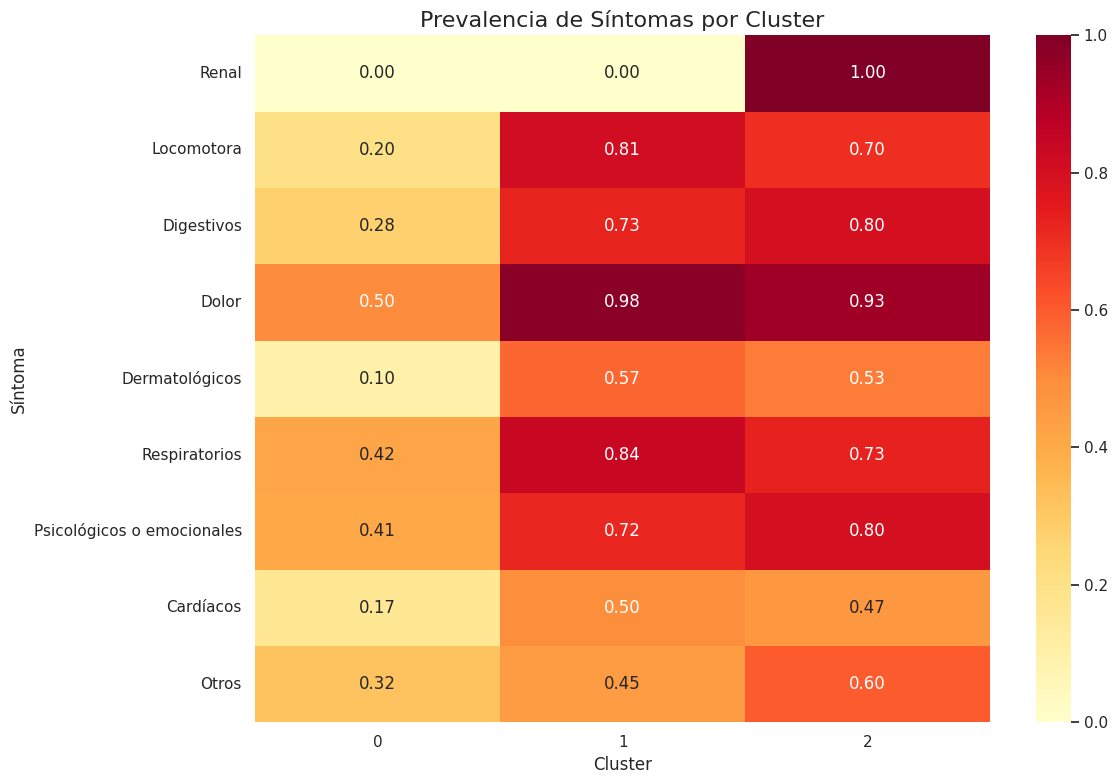

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from collections import Counter
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import networkx as nx

# Cargar datos (ajusta esto según tu archivo real)
df = pd.read_excel(r'/content/drive/MyDrive/Colab Notebooks/percepcion_covid_persistente.xlsx', sheet_name='Respuestas de formulario 1')

# Filtrar solo pacientes con COVID persistente (columna B = 1)
df = df[df['¿Es usted un paciente con síntomas prolongados de COVID-19?'] == 1]


# Configuración visual
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)


## 1. Preparación de datos
# Asumiendo que df es tu DataFrame y las columnas de síntomas son binarias (1=presente, 0=ausente)
sintomas_cols_long = df.columns[28:37]
df_sintomas = df[sintomas_cols_long].copy()

def clean_col_name(col_name):
    prefix = '¿Qué tipo de síntomas persistentes tiene o ha tenido? '
    name = col_name.replace(prefix, '').replace('.', '')
    return name

df_sintomas.columns = [clean_col_name(col) for col in df_sintomas.columns]
sintomas_cols = list(df_sintomas.columns)
palette = sns.color_palette("husl", len(sintomas_cols))

## 2. Identificación de combinaciones de 3 síntomas
print("\n=== COMBINACIONES FRECUENTES DE 3 SÍNTOMAS ===\n")

# Contar combinaciones de 3 síntomas
contador_trios = Counter()
combinaciones_pacientes = []

for _, row in df_sintomas.iterrows():
    sintomas_presentes = [sintoma for sintoma in sintomas_cols if row[sintoma] == 1]
    combinaciones_pacientes.append(sintomas_presentes)
    trios = combinations(sintomas_presentes, 3)
    contador_trios.update(trios)

# Mostrar los 10 tríos más frecuentes
top_trios = contador_trios.most_common(15)

# Crear DataFrame para visualización
df_trios = pd.DataFrame(top_trios, columns=['Combinación', 'Frecuencia'])
df_trios['Porcentaje'] = (df_trios['Frecuencia'] / len(df)) * 100
df_trios['Combinación'] = df_trios['Combinación'].apply(lambda x: " + ".join(x))

print(df_trios.head(10))

# Visualización
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='Porcentaje', y='Combinación', data=df_trios.head(10), palette='rocket')
plt.title('Top 10 Combinaciones de 3 Síntomas Más Frecuentes', fontsize=16)
plt.xlabel('Porcentaje de Pacientes (%)')
plt.ylabel('Combinación de Síntomas')

# Añadir etiquetas de valor
for p in ax.patches:
    width = p.get_width()
    plt.text(width + 0.5, p.get_y() + p.get_height()/2, f'{width:.1f}%', ha='left', va='center')
plt.tight_layout()
plt.show()

## 3. Análisis de asociación para combinaciones complejas
print("\n=== REGLAS DE ASOCIACIÓN PARA COMBINACIONES COMPLEJAS ===\n")

# Preparar datos para análisis de asociación
te = TransactionEncoder()
te_ary = te.fit(combinaciones_pacientes).transform(combinaciones_pacientes)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Encontrar itemsets frecuentes (combinaciones que aparecen en al menos 10% de los pacientes)
frequent_itemsets = apriori(df_encoded, min_support=0.1, use_colnames=True, max_len=4)

# Ordenar por frecuencia
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets = frequent_itemsets.sort_values(['length', 'support'], ascending=[False, False])

print("Combinaciones frecuentes de 3 y 4 síntomas:")
print(frequent_itemsets[(frequent_itemsets['length'] >= 3)].head(15))

## 4. Red de co-ocurrencia de síntomas
print("\n=== RED DE CO-OCURRENCIA DE SÍNTOMAS ===\n")

# Crear matriz de co-ocurrencia para visualización de red
co_occurrence_matrix = pd.DataFrame(0, index=sintomas_cols, columns=sintomas_cols)

for sintomas in combinaciones_pacientes:
    for a, b in combinations(sintomas, 2):
        co_occurrence_matrix.loc[a, b] += 1
        co_occurrence_matrix.loc[b, a] += 1

# Visualización con networkx
plt.figure(figsize=(14, 10))
G = nx.Graph()

# Añadir nodos (síntomas)
for sintoma in sintomas_cols:
    G.add_node(sintoma, size=df_sintomas[sintoma].sum())

# Añadir aristas (conexiones entre síntomas)
for i in range(len(sintomas_cols)):
    for j in range(i+1, len(sintomas_cols)):
        sintoma1 = sintomas_cols[i]
        sintoma2 = sintomas_cols[j]
        peso = co_occurrence_matrix.loc[sintoma1, sintoma2]
        if peso > 0:
            G.add_edge(sintoma1, sintoma2, weight=peso)

# Calcular posiciones
pos = nx.spring_layout(G, k=0.5)

# Dibujar la red
node_sizes = [G.nodes[n]['size'] for n in G.nodes()]
edge_weights = [G.edges[e]['weight']/10 for e in G.edges()]

nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=palette)
nx.draw_networkx_edges(G, pos, width=edge_weights, edge_color='gray', alpha=0.6)
nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')

# Resaltar comunidades
from networkx.algorithms import community
communities = community.greedy_modularity_communities(G)
for i, comm in enumerate(communities):
    nx.draw_networkx_nodes(G, pos, nodelist=list(comm), node_color=palette[i], label=f'Grupo {i+1}')

plt.title('Red de Co-ocurrencia de Síntomas (Tamaño = Frecuencia, Grosor = Co-ocurrencia)', fontsize=14)
plt.axis('off')
plt.legend()
plt.tight_layout()
plt.show()

## 5. Análisis de clusters de pacientes por síntomas
print("\n=== CLUSTERS DE PACIENTES POR PATRONES DE SÍNTOMAS ===\n")

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Preparar datos para clustering
X = df_sintomas.values

# Estandarizar y reducir dimensionalidad
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Determinar número óptimo de clusters (método del codo)
inertias = []
for k in range(1, 6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 6), inertias, marker='o')
plt.title('Método del Codo para Determinar Número de Clusters')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.xticks(range(1, 6))
plt.grid(True)
plt.show()

# Aplicar K-means con 3 clusters (basado en el método del codo)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
df_sintomas['Cluster'] = clusters

# Analizar características de cada cluster
cluster_analysis = df_sintomas.groupby('Cluster')[sintomas_cols].mean().T
cluster_analysis['Diferencia'] = cluster_analysis.max(axis=1) - cluster_analysis.min(axis=1)
cluster_analysis = cluster_analysis.sort_values('Diferencia', ascending=False)

print("Prevalencia de síntomas por cluster:")
print(cluster_analysis)

# Visualización de clusters
plt.figure(figsize=(14, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='viridis', s=100)
plt.title('Clusters de Pacientes Basados en Patrones de Síntomas (PCA)', fontsize=16)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# Heatmap de síntomas por cluster
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_analysis.drop('Diferencia', axis=1), annot=True, fmt=".2f", cmap="YlOrRd")
plt.title('Prevalencia de Síntomas por Cluster', fontsize=16)
plt.ylabel('Síntoma')
plt.xlabel('Cluster')
plt.tight_layout()
plt.show()


=== FRECUENCIA INDIVIDUAL DE SÍNTOMAS ===

                            Frecuencia  Porcentaje
Emociones_negativas               1420  394.444444
Emociones_positivas                945  262.500000
Dolor                              280   77.777778
Respiratorios                      236   65.555556
Psicológicos o emocionales         215   59.722222
Locomotora                         198   55.000000
Digestivos                         197   54.722222
Otros                              148   41.111111
Dermatológicos                     135   37.500000
Cardíacos                          129   35.833333
Renal                               30    8.333333


/tmp/ipython-input-17-3053042143.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df_frecuencia.index, y='Porcentaje', data=df_frecuencia, palette=palette)
/tmp/ipython-input-17-3053042143.py:49: UserWarning: 
The palette list has fewer values (10) than needed (11) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(x=df_frecuencia.index, y='Porcentaje', data=df_frecuencia, palette=palette)


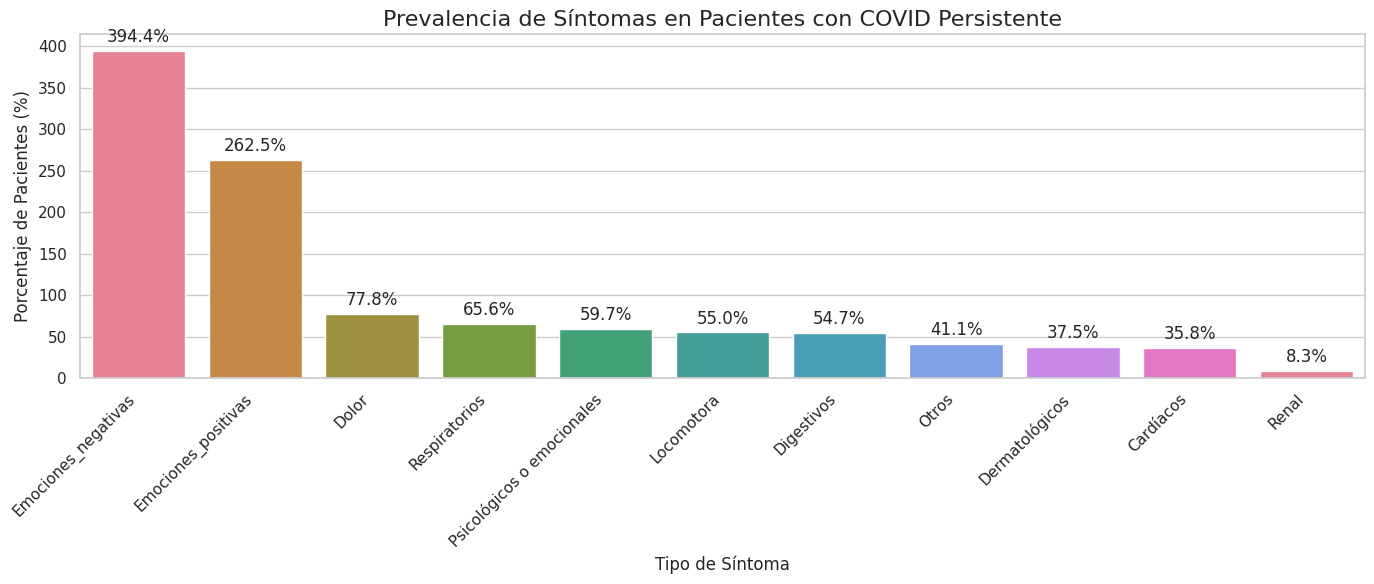


=== COMBINACIONES FRECUENTES DE SÍNTOMAS (PARES) ===

Pares de síntomas más frecuentes:
Dolor + Respiratorios: 197 pacientes (54.7%)
Dolor + Locomotora: 182 pacientes (50.6%)
Dolor + Psicológicos o emocionales: 178 pacientes (49.4%)
Digestivos + Dolor: 167 pacientes (46.4%)
Locomotora + Respiratorios: 149 pacientes (41.4%)
Psicológicos o emocionales + Respiratorios: 147 pacientes (40.8%)
Digestivos + Respiratorios: 138 pacientes (38.3%)
Locomotora + Psicológicos o emocionales: 129 pacientes (35.8%)
Digestivos + Psicológicos o emocionales: 128 pacientes (35.6%)
Dolor + Otros: 126 pacientes (35.0%)


/tmp/ipython-input-17-3053042143.py:93: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Combinación', y='Porcentaje', data=df_pares, palette='viridis')


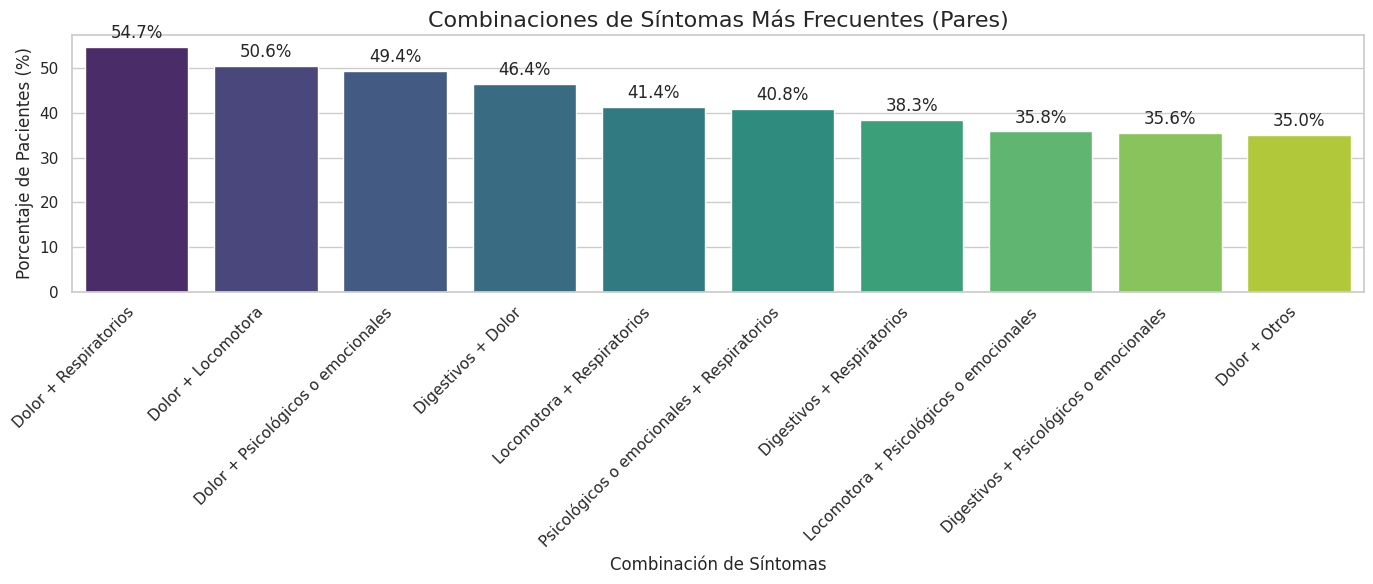


=== REGLAS DE ASOCIACIÓN ENTRE SÍNTOMAS ===

Reglas de asociación más relevantes:
                                            antecedents  \
6475  (Dermatológicos, Locomotora, Cardíacos, Digest...   
6977  (Locomotora, Cardíacos, Dermatológicos, Emocio...   
6705  (Locomotora, Cardíacos, Digestivos, Emociones_...   
3402            (Locomotora, Cardíacos, Dermatológicos)   
4134  (Cardíacos, Dermatológicos, Emociones_negativa...   
8401  (Locomotora, Emociones_positivas, Cardíacos, D...   
7321  (Dermatológicos, Cardíacos, Digestivos, Emocio...   
7315  (Cardíacos, Respiratorios, Dermatológicos, Dol...   
2760  (Psicológicos o emocionales, Cardíacos, Dermat...   
2755  (Psicológicos o emocionales, Cardíacos, Dermat...   

                 consequents   support  confidence      lift  
6475  (Dolor, Respiratorios)  0.100000    0.947368  1.731232  
6977  (Dolor, Respiratorios)  0.100000    0.923077  1.686841  
6705  (Dolor, Respiratorios)  0.122222    0.916667  1.675127  
3402  (Dolor, R

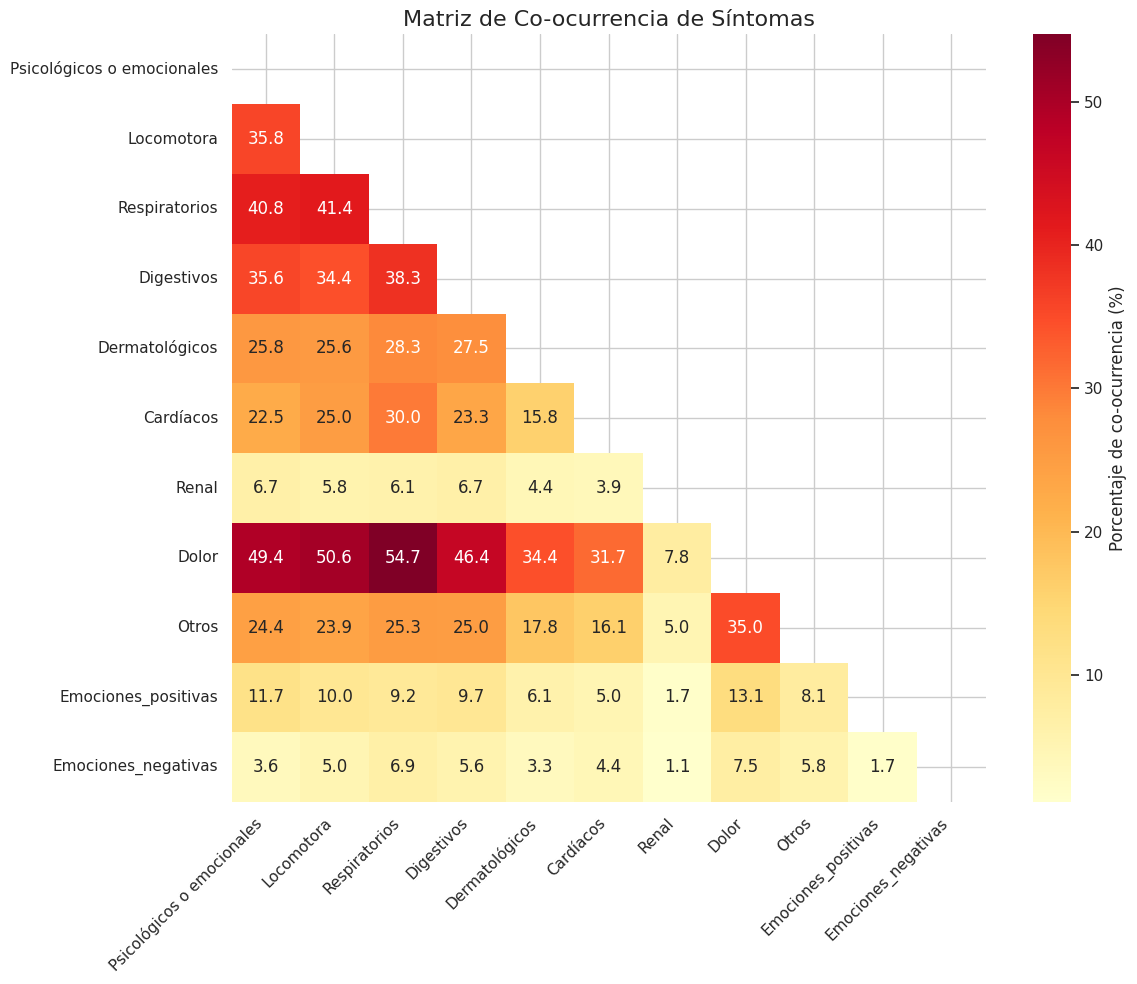


=== NÚMERO DE SÍNTOMAS POR PACIENTE ===



/tmp/ipython-input-17-3053042143.py:162: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Total_síntomas', data=df_sintomas, palette='Blues_r')


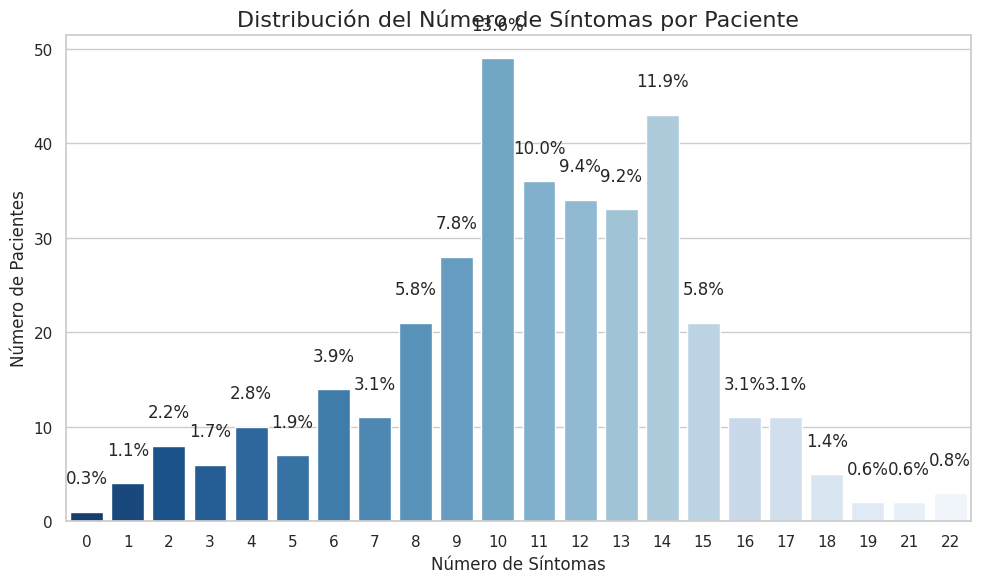

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from collections import Counter
from mlxtend.frequent_patterns import apriori, association_rules

# Configuración visual
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)
palette = sns.color_palette("husl", 10)

# 1. Preparación de datos
# Seleccionar columnas de síntomas de forma dinámica para evitar KeyErrors
sintomas_cols_long = df.columns[28:]
df_sintomas = df[sintomas_cols_long].copy()

# Ensure all symptom columns are numeric, coercing errors to 0
for col in df_sintomas.columns:
    df_sintomas[col] = pd.to_numeric(df_sintomas[col], errors='coerce').fillna(0).astype(int)

# Limpiar los nombres de las columnas para facilitar su uso y mejorar los gráficos
def clean_col_name(col_name):
    prefix = '¿Qué tipo de síntomas persistentes tiene o ha tenido? '
    name = col_name.replace(prefix, '').replace('.', '').replace('(1-7)', '').replace('(1-10)', '').strip()
    return name

df_sintomas.columns = [clean_col_name(col) for col in df_sintomas.columns]

# La lista de síntomas ahora contiene los nombres limpios
sintomas_cols = list(df_sintomas.columns)


# 2. Frecuencia individual de síntomas
print("\n=== FRECUENCIA INDIVIDUAL DE SÍNTOMAS ===\n")
frecuencia_sintomas = df_sintomas.sum().sort_values(ascending=False)
porcentaje_sintomas = (frecuencia_sintomas / len(df)) * 100

# Crear DataFrame con los resultados
df_frecuencia = pd.DataFrame({
    'Frecuencia': frecuencia_sintomas,
    'Porcentaje': porcentaje_sintomas
})
print(df_frecuencia)

# Gráfico de frecuencia de síntomas
plt.figure(figsize=(14, 6))
ax = sns.barplot(x=df_frecuencia.index, y='Porcentaje', data=df_frecuencia, palette=palette)
plt.title('Prevalencia de Síntomas en Pacientes con COVID Persistente', fontsize=16)
plt.ylabel('Porcentaje de Pacientes (%)')
plt.xlabel('Tipo de Síntoma')
plt.xticks(rotation=45, ha='right')

# Añadir etiquetas con los valores
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')
plt.tight_layout()
plt.show()

# 3. Combinaciones frecuentes de síntomas (pares)
print("\n=== COMBINACIONES FRECUENTES DE SÍNTOMAS (PARES) ===\n")

# Encontrar todas las combinaciones de síntomas presentes en cada paciente
combinaciones = []
for _, row in df_sintomas.iterrows():
    presentes = [sintoma for sintoma in sintomas_cols if row[sintoma] == 1]
    combinaciones.append(presentes)

# Contar combinaciones de pares de síntomas
contador_pares = Counter()
for lista_sintomas in combinaciones:
    # Generar todos los pares posibles para cada paciente
    pares = combinations(sorted(lista_sintomas), 2)
    contador_pares.update(pares)

# Mostrar los 10 pares más comunes
top_pares = contador_pares.most_common(10)
print("Pares de síntomas más frecuentes:")
for par, count in top_pares:
    print(f"{par[0]} + {par[1]}: {count} pacientes ({count/len(df)*100:.1f}%)")

# Gráfico de pares frecuentes
df_pares = pd.DataFrame(top_pares, columns=['Combinación', 'Frecuencia'])
df_pares['Combinación'] = df_pares['Combinación'].apply(lambda x: f"{x[0]} + {x[1]}")
df_pares['Porcentaje'] = (df_pares['Frecuencia'] / len(df)) * 100

plt.figure(figsize=(14, 6))
ax = sns.barplot(x='Combinación', y='Porcentaje', data=df_pares, palette='viridis')
plt.title('Combinaciones de Síntomas Más Frecuentes (Pares)', fontsize=16)
plt.ylabel('Porcentaje de Pacientes (%)')
plt.xlabel('Combinación de Síntomas')
plt.xticks(rotation=45, ha='right')

# Añadir etiquetas
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')
plt.tight_layout()
plt.show()

# 4. Análisis de asociación (reglas de asociación)
print("\n=== REGLAS DE ASOCIACIÓN ENTRE SÍNTOMAS ===\n")

# Convertir datos a formato one-hot
df_encoded = df_sintomas.astype(bool)

# Aplicar algoritmo Apriori para encontrar itemsets frecuentes
frequent_itemsets = apriori(df_encoded, min_support=0.1, use_colnames=True)

# Generar reglas de asociación
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.2)

# Filtrar reglas interesantes
interesting_rules = rules[
    (rules['lift'] > 1.5) &
    (rules['confidence'] > 0.6)
].sort_values('confidence', ascending=False)

# Mostrar las reglas más relevantes
print("Reglas de asociación más relevantes:")
print(interesting_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))

# 5. Matriz de co-ocurrencia de síntomas
print("\n=== MATRIZ DE CO-OCURRENCIA DE SÍNTOMAS ===\n")

# Crear matriz de co-ocurrencia
co_occurrence = pd.DataFrame(np.zeros((len(sintomas_cols), len(sintomas_cols))),
                            index=sintomas_cols, columns=sintomas_cols)

for lista_sintomas in combinaciones:
    for a, b in combinations(sorted(lista_sintomas), 2):
        co_occurrence.loc[a, b] += 1
        co_occurrence.loc[b, a] += 1

# Convertir a porcentaje
co_occurrence_pct = (co_occurrence / len(df)) * 100

# Visualizar matriz de co-ocurrencia
plt.figure(figsize=(12, 10))
sns.heatmap(co_occurrence_pct, annot=True, fmt=".1f", cmap="YlOrRd",
            mask=np.triu(np.ones_like(co_occurrence_pct, dtype=bool)),
            cbar_kws={'label': 'Porcentaje de co-ocurrencia (%)'})
plt.title('Matriz de Co-ocurrencia de Síntomas', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# 6. Número de síntomas por paciente
print("\n=== NÚMERO DE SÍNTOMAS POR PACIENTE ===\n")
df_sintomas['Total_síntomas'] = df_sintomas[sintomas_cols].sum(axis=1)

plt.figure(figsize=(10, 6))
sns.countplot(x='Total_síntomas', data=df_sintomas, palette='Blues_r')
plt.title('Distribución del Número de Síntomas por Paciente', fontsize=16)
plt.xlabel('Número de Síntomas')
plt.ylabel('Número de Pacientes')

# Añadir porcentajes
total = len(df_sintomas)
for p in plt.gca().patches:
    height = p.get_height()
    if height > 0:
        plt.gca().text(p.get_x()+p.get_width()/2., height + 3,
                       f'{height/total*100:.1f}%', ha='center')
plt.tight_layout()
plt.show()